# Flood Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<!-- 'conda install -n dl ipykernel --update-deps --force-reinstall' -->

In [2]:
pd.set_option('mode.chained_assignment',  None) # warning 제거

### Data load

In [3]:
datas = []

for rep in range(2012, 2023):
    data = pd.read_csv('./data/water_data/data_' + str(rep) + '.csv')
    datas.append(data)

In [4]:
for data in datas:
    print(data.shape) # 2012 ~ 2021: (26496, 15), 2022: (11376, 15)

(26496, 15)
(26496, 15)
(26496, 15)
(26496, 15)
(26496, 15)
(26496, 15)
(26496, 15)
(26496, 15)
(26496, 15)
(26496, 15)
(11376, 15)


In [5]:
for data in datas:
    print(data.duplicated().sum()) # 중복 데이터 x

0
0
0
0
0
0
0
0
0
0
0


In [6]:
# 모든 년도 data의 column corr 추출

data_all = pd.concat([data for data in datas], axis=0)

data_corr = data_all.corr()

data_corr['wl_1018662'].sort_values(ascending=False)

wl_1018662    1.000000
wl_1018680    0.993364
wl_1018683    0.992271
wl_1019630    0.958617
fw_1019630    0.752340
fw_1018662    0.741266
tototf        0.709398
inf           0.699971
fw_1018683    0.655167
ecpc          0.063409
tide_level   -0.002609
sfw          -0.063405
swl          -0.066725
fw_1018680         NaN
Name: wl_1018662, dtype: float64

In [7]:
data_all.fw_1018680.value_counts() # fw_1018680: 0 or nan

0.0    79487
Name: fw_1018680, dtype: int64

In [8]:
data_all.isna().sum()

ymdhm              0
swl              743
inf              743
sfw              743
ecpc             743
tototf           743
tide_level      4927
wl_1018662        59
fw_1018662     16380
wl_1018680        59
fw_1018680    196849
wl_1018683        59
fw_1018683      1279
wl_1019630        59
fw_1019630        59
dtype: int64

In [9]:
data_all.isin([0]).sum()

ymdhm             0
swl              83
inf           10122
sfw              82
ecpc              0
tototf          447
tide_level        0
wl_1018662     6912
fw_1018662        0
wl_1018680     6912
fw_1018680    79487
wl_1018683     6912
fw_1018683      183
wl_1019630     6912
fw_1019630        0
dtype: int64

In [10]:
# sns.pairplot(data_corr)
# plt.show()

### Data Preprocessing

#### 1. 2012 data

In [11]:
data_2012 = datas[0].copy()

data_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       26496 non-null  object 
 1   swl         26495 non-null  float64
 2   inf         26495 non-null  float64
 3   sfw         26495 non-null  float64
 4   ecpc        26495 non-null  float64
 5   tototf      26495 non-null  float64
 6   tide_level  25720 non-null  float64
 7   wl_1018662  26496 non-null  float64
 8   fw_1018662  26496 non-null  float64
 9   wl_1018680  26496 non-null  float64
 10  fw_1018680  26496 non-null  float64
 11  wl_1018683  26496 non-null  float64
 12  fw_1018683  26496 non-null  float64
 13  wl_1019630  26496 non-null  float64
 14  fw_1019630  26496 non-null  float64
dtypes: float64(14), object(1)
memory usage: 3.0+ MB


In [12]:
data_2012.isna().sum()

ymdhm           0
swl             1
inf             1
sfw             1
ecpc            1
tototf          1
tide_level    776
wl_1018662      0
fw_1018662      0
wl_1018680      0
fw_1018680      0
wl_1018683      0
fw_1018683      0
wl_1019630      0
fw_1019630      0
dtype: int64

In [13]:
data_2012 = data_2012[['ymdhm', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683', 'fw_1019630',
                       'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

data_2012.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3


In [14]:
data_2012.isna().sum()

ymdhm           0
swl             1
inf             1
sfw             1
ecpc            1
tototf          1
tide_level    776
fw_1018662      0
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
dtype: int64

In [15]:
# mean 할당 (단, 월별 mean값 부여)

In [16]:
# row 별 month 추출 method

def get_month(data):
    idx = data.iloc[0, 0].split('-')[1]
    months = []

    for idx in range(len(data)):
        idx = data.iloc[idx, 0].split('-')[1]
        
        months.append(int(idx))

    months = np.array(months)
    
    return months

In [17]:
# 월별로 분류히기 위해 row 별 month 추출

months = get_month(data_2012)

months[:5]

array([5, 5, 5, 5, 5])

In [18]:
# month column 추가

months = months.reshape(-1)

data_2012['month'] = months

data_2012.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,5
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,5
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,5
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,5
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,5


In [19]:
# data_2012 월별 split

data_2012_m5 = data_2012.groupby('month').get_group(5)
data_2012_m6 = data_2012.groupby('month').get_group(6)
data_2012_m7 = data_2012.groupby('month').get_group(7)
data_2012_m8 = data_2012.groupby('month').get_group(8)
data_2012_m9 = data_2012.groupby('month').get_group(9)
data_2012_m10 = data_2012.groupby('month').get_group(10)

In [20]:
# 월별 nan값 찾는 method

def find_nan(datas):
    month = 5
    
    for data in datas:
        print(str(month) + '월')
        print(data.isna().sum())
        print()
        
        month += 1

In [21]:
find_nan([data_2012_m5, data_2012_m6, data_2012_m7, data_2012_m8, data_2012_m9, data_2012_m10])

5월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level    702
fw_1018662      0
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

6월
ymdhm          0
swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level    67
fw_1018662     0
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

7월
ymdhm         0
swl           1
inf           1
sfw           1
ecpc          1
tototf        1
tide_level    1
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    1
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_10

In [22]:
# nan 값 mean으로 변경 (5월)

tide_level_mean = data_2012_m5.tide_level.mean()

data_2012_m5.tide_level[data_2012_m5.tide_level.isna()] = tide_level_mean

In [23]:
find_nan([data_2012_m5, data_2012_m6, data_2012_m7, data_2012_m8, data_2012_m9, data_2012_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm          0
swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level    67
fw_1018662     0
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

7월
ymdhm         0
swl           1
inf           1
sfw           1
ecpc          1
tototf        1
tide_level    1
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    1
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_

In [24]:
# nan 값 mean으로 변경 (6월)

tide_level_mean = data_2012_m6.tide_level.mean()

data_2012_m6.tide_level[data_2012_m6.tide_level.isna()] = tide_level_mean

In [25]:
find_nan([data_2012_m5, data_2012_m6, data_2012_m7, data_2012_m8, data_2012_m9, data_2012_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           1
inf           1
sfw           1
ecpc          1
tototf        1
tide_level    1
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    1
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [26]:
# nan 값 mean으로 변경(7월)

swl_mean = data_2012_m7.swl.mean()
inf_mean = data_2012_m7.inf.mean()
sfw_mean = data_2012_m7.sfw.mean()
ecpc_mean = data_2012_m7.ecpc.mean()
tototf_mean = data_2012_m7.tototf.mean()
tide_level_mean = data_2012_m7.tide_level.mean()

data_2012_m7.swl[data_2012_m7.swl.isna()] = swl_mean
data_2012_m7.inf[data_2012_m7.inf.isna()] = inf_mean
data_2012_m7.sfw[data_2012_m7.sfw.isna()] = sfw_mean
data_2012_m7.ecpc[data_2012_m7.ecpc.isna()] = ecpc_mean
data_2012_m7.tototf[data_2012_m7.tototf.isna()] = tototf_mean
data_2012_m7.tide_level[data_2012_m7.tide_level.isna()] = tide_level_mean

In [27]:
find_nan([data_2012_m5, data_2012_m6, data_2012_m7, data_2012_m8, data_2012_m9, data_2012_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    1
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [28]:
# nan 값 mean으로 변경(8월)

tide_level_mean = data_2012_m8.tide_level.mean()

data_2012_m8.tide_level[data_2012_m8.tide_level.isna()] = tide_level_mean

In [29]:
find_nan([data_2012_m5, data_2012_m6, data_2012_m7, data_2012_m8, data_2012_m9, data_2012_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [30]:
# nan 값 mean으로 변경(9월)

tide_level_mean = data_2012_m9.tide_level.mean()

data_2012_m9.tide_level[data_2012_m9.tide_level.isna()] = tide_level_mean

In [31]:
find_nan([data_2012_m5, data_2012_m6, data_2012_m7, data_2012_m8, data_2012_m9, data_2012_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [32]:
# dataset 생성

dataset = pd.concat([data_2012_m5, data_2012_m6, data_2012_m7, data_2012_m8, data_2012_m9, data_2012_m10], axis=0)

dataset

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,5
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,5
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,5
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,5
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2012-10-31 23:10,25.250,270.2,235.01,8.99,270.2,300.0,1018.67,1395.30,1837.11,372.7,364.2,365.0,351.3,10
26492,2012-10-31 23:20,25.250,264.1,235.01,8.99,264.1,286.0,945.75,1154.21,1814.92,365.7,359.2,362.0,350.3,10
26493,2012-10-31 23:30,25.250,257.9,235.01,8.99,257.9,273.0,915.35,968.58,1792.88,362.7,356.2,359.0,349.3,10
26494,2012-10-31 23:40,25.250,264.1,235.01,8.99,264.1,261.0,846.39,776.99,1727.56,355.7,352.2,356.0,346.3,10


#### 2. 2013 data

In [33]:
data_2013 = datas[1].copy()

data_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       26496 non-null  object 
 1   swl         26496 non-null  float64
 2   inf         26496 non-null  float64
 3   sfw         26496 non-null  float64
 4   ecpc        26496 non-null  float64
 5   tototf      26496 non-null  float64
 6   tide_level  26481 non-null  float64
 7   wl_1018662  26496 non-null  float64
 8   fw_1018662  26496 non-null  float64
 9   wl_1018680  26496 non-null  float64
 10  fw_1018680  26496 non-null  float64
 11  wl_1018683  26496 non-null  float64
 12  fw_1018683  26496 non-null  float64
 13  wl_1019630  26496 non-null  float64
 14  fw_1019630  26496 non-null  float64
dtypes: float64(14), object(1)
memory usage: 3.0+ MB


In [34]:
data_2013 = data_2013[['ymdhm', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683', 'fw_1019630',
                       'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

data_2013.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2013-05-01 00:00,25.290,151.0,236.48,7.53,151.0,384.0,639.32,-993.41,958.36,332.7,317.2,314.0,305.3
1,2013-05-01 00:10,25.289,173.8,236.45,7.56,173.8,369.0,690.47,-775.22,911.07,338.7,327.2,316.0,302.3
2,2013-05-01 00:20,25.289,173.8,236.45,7.56,173.8,353.0,734.64,-380.85,834.96,343.7,334.2,324.0,297.3
3,2013-05-01 00:30,25.288,173.8,236.41,7.59,173.8,338.0,770.98,-52.67,762.23,347.7,337.2,326.0,292.3
4,2013-05-01 00:40,25.278,73.9,236.04,7.96,173.9,322.0,789.50,237.34,706.48,349.7,338.2,327.0,288.3


In [35]:
data_2013.isna().sum()

ymdhm          0
swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level    15
fw_1018662     0
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
dtype: int64

In [36]:
# 월별로 분류히기 위해 row 별 month 추출

months = get_month(data_2013)

months[:5]

array([5, 5, 5, 5, 5])

In [37]:
# month column 추가

months = months.reshape(-1)

data_2013['month'] = months

data_2013.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2013-05-01 00:00,25.290,151.0,236.48,7.53,151.0,384.0,639.32,-993.41,958.36,332.7,317.2,314.0,305.3,5
1,2013-05-01 00:10,25.289,173.8,236.45,7.56,173.8,369.0,690.47,-775.22,911.07,338.7,327.2,316.0,302.3,5
2,2013-05-01 00:20,25.289,173.8,236.45,7.56,173.8,353.0,734.64,-380.85,834.96,343.7,334.2,324.0,297.3,5
3,2013-05-01 00:30,25.288,173.8,236.41,7.59,173.8,338.0,770.98,-52.67,762.23,347.7,337.2,326.0,292.3,5
4,2013-05-01 00:40,25.278,73.9,236.04,7.96,173.9,322.0,789.50,237.34,706.48,349.7,338.2,327.0,288.3,5


In [38]:
# data_2013 월별 split

data_2013_m5 = data_2013.groupby('month').get_group(5)
data_2013_m6 = data_2013.groupby('month').get_group(6)
data_2013_m7 = data_2013.groupby('month').get_group(7)
data_2013_m8 = data_2013.groupby('month').get_group(8)
data_2013_m9 = data_2013.groupby('month').get_group(9)
data_2013_m10 = data_2013.groupby('month').get_group(10)

In [39]:
find_nan([data_2013_m5, data_2013_m6, data_2013_m7, data_2013_m8, data_2013_m9, data_2013_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    3
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    3
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    2
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [40]:
# nan 값 mean으로 변경(5월)

tide_level_mean = data_2013_m5.tide_level.mean()

data_2013_m5.tide_level[data_2013_m5.tide_level.isna()] = tide_level_mean

In [41]:
find_nan([data_2013_m5, data_2013_m6, data_2013_m7, data_2013_m8, data_2013_m9, data_2013_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    3
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    2
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [42]:
# nan 값 mean으로 변경(6월)

tide_level_mean = data_2013_m6.tide_level.mean()

data_2013_m6.tide_level[data_2013_m6.tide_level.isna()] = tide_level_mean

In [43]:
find_nan([data_2013_m5, data_2013_m6, data_2013_m7, data_2013_m8, data_2013_m9, data_2013_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    2
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [44]:
# nan 값 mean으로 변경(7월)

tide_level_mean = data_2013_m7.tide_level.mean()

data_2013_m7.tide_level[data_2013_m7.tide_level.isna()] = tide_level_mean

In [45]:
find_nan([data_2013_m5, data_2013_m6, data_2013_m7, data_2013_m8, data_2013_m9, data_2013_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [46]:
# nan 값 mean으로 변경(9월)

tide_level_mean = data_2013_m9.tide_level.mean()

data_2013_m9.tide_level[data_2013_m9.tide_level.isna()] = tide_level_mean

In [47]:
find_nan([data_2013_m5, data_2013_m6, data_2013_m7, data_2013_m8, data_2013_m9, data_2013_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [48]:
# nan 값 mean으로 변경(10월)

tide_level_mean = data_2013_m10.tide_level.mean()

data_2013_m10.tide_level[data_2013_m10.tide_level.isna()] = tide_level_mean

In [49]:
find_nan([data_2013_m5, data_2013_m6, data_2013_m7, data_2013_m8, data_2013_m9, data_2013_m10]) # 변경 확인

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [50]:
# dataset 생성

dataset = pd.concat([dataset, data_2013_m5, data_2013_m6, data_2013_m7, data_2013_m8, data_2013_m9, data_2013_m10], axis=0)

dataset

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,5
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,5
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,5
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,5
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2013-10-31 23:10,25.231,171.9,234.40,9.60,171.9,109.0,280.22,372.96,366.60,280.7,274.2,268.0,259.3,10
26492,2013-10-31 23:20,25.224,71.0,234.10,9.90,171.0,124.0,280.22,348.63,366.60,280.7,274.2,268.0,259.3,10
26493,2013-10-31 23:30,25.219,70.6,233.91,10.09,170.6,141.0,280.22,315.76,376.45,280.7,273.2,267.0,260.3,10
26494,2013-10-31 23:40,25.219,70.2,233.91,10.09,170.2,157.0,280.22,263.13,376.45,280.7,273.2,267.0,260.3,10


#### 3. 2014 data

In [51]:
data_2014 = datas[2].copy()

data_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       26496 non-null  object 
 1   swl         26476 non-null  float64
 2   inf         26476 non-null  float64
 3   sfw         26476 non-null  float64
 4   ecpc        26476 non-null  float64
 5   tototf      26476 non-null  float64
 6   tide_level  26492 non-null  float64
 7   wl_1018662  26496 non-null  float64
 8   fw_1018662  26496 non-null  float64
 9   wl_1018680  26496 non-null  float64
 10  fw_1018680  26495 non-null  float64
 11  wl_1018683  26496 non-null  float64
 12  fw_1018683  26496 non-null  float64
 13  wl_1019630  26496 non-null  float64
 14  fw_1019630  26496 non-null  float64
dtypes: float64(14), object(1)
memory usage: 3.0+ MB


In [52]:
data_2014 = data_2014[['ymdhm', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683', 'fw_1019630',
                       'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

data_2014.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2014-05-01 00:00,25.280,132.0,236.11,7.89,132.0,196.0,582.21,350.33,1056.61,325.7,316.2,315.0,311.3
1,2014-05-01 00:10,25.289,126.3,236.45,7.56,126.3,185.0,590.20,249.84,1006.88,326.7,315.2,312.0,308.3
2,2014-05-01 00:20,25.289,126.3,236.45,7.56,126.3,175.0,590.20,206.48,958.36,326.7,315.2,311.0,305.3
3,2014-05-01 00:30,25.289,132.2,236.45,7.56,132.2,165.0,598.25,249.50,911.07,327.7,315.2,311.0,302.3
4,2014-05-01 00:40,25.289,126.2,236.45,7.56,126.2,155.0,598.25,305.01,849.91,327.7,314.2,310.0,298.3


In [53]:
data_2014.isna().sum()

ymdhm          0
swl           20
inf           20
sfw           20
ecpc          20
tototf        20
tide_level     4
fw_1018662     0
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
dtype: int64

In [54]:
# mean 할당 (단, 월별 mean값 부여)

In [55]:
# 월별로 분류히기 위해 row 별 month 추출

months = get_month(data_2014)

months[:5]

array([5, 5, 5, 5, 5])

In [56]:
# month column 추가

months = months.reshape(-1)

data_2014['month'] = months

data_2014.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2014-05-01 00:00,25.280,132.0,236.11,7.89,132.0,196.0,582.21,350.33,1056.61,325.7,316.2,315.0,311.3,5
1,2014-05-01 00:10,25.289,126.3,236.45,7.56,126.3,185.0,590.20,249.84,1006.88,326.7,315.2,312.0,308.3,5
2,2014-05-01 00:20,25.289,126.3,236.45,7.56,126.3,175.0,590.20,206.48,958.36,326.7,315.2,311.0,305.3,5
3,2014-05-01 00:30,25.289,132.2,236.45,7.56,132.2,165.0,598.25,249.50,911.07,327.7,315.2,311.0,302.3,5
4,2014-05-01 00:40,25.289,126.2,236.45,7.56,126.2,155.0,598.25,305.01,849.91,327.7,314.2,310.0,298.3,5


In [57]:
# data_2014 월별 split

data_2014_m5 = data_2014.groupby('month').get_group(5)
data_2014_m6 = data_2014.groupby('month').get_group(6)
data_2014_m7 = data_2014.groupby('month').get_group(7)
data_2014_m8 = data_2014.groupby('month').get_group(8)
data_2014_m9 = data_2014.groupby('month').get_group(9)
data_2014_m10 = data_2014.groupby('month').get_group(10)

In [58]:
find_nan([data_2014_m5, data_2014_m6, data_2014_m7, data_2014_m8, data_2014_m9, data_2014_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    2
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    1
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm          0
swl           20
inf           20
sfw           20
ecpc          20
tototf        20
tide_level     0
fw_1018662     0
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_10

In [59]:
# nan 값 mean으로 변경 (5월)

tide_level_mean = data_2014_m5.tide_level.mean()

data_2014_m5.tide_level[data_2014_m5.tide_level.isna()] = tide_level_mean

In [60]:
find_nan([data_2014_m5, data_2014_m6, data_2014_m7, data_2014_m8, data_2014_m9, data_2014_m10]) # 변경 확인

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    1
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm          0
swl           20
inf           20
sfw           20
ecpc          20
tototf        20
tide_level     0
fw_1018662     0
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_10

In [61]:
# nan 값 mean으로 변경 (7월)

tide_level_mean = data_2014_m7.tide_level.mean()

data_2014_m7.tide_level[data_2014_m7.tide_level.isna()] = tide_level_mean

In [62]:
find_nan([data_2014_m5, data_2014_m6, data_2014_m7, data_2014_m8, data_2014_m9, data_2014_m10]) # 변경 확인

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm          0
swl           20
inf           20
sfw           20
ecpc          20
tototf        20
tide_level     0
fw_1018662     0
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_10

In [63]:
# nan 값 mean으로 변경 (8월)

swl_mean = data_2014_m8.swl.mean()
inf_mean = data_2014_m8.inf.mean()
sfw_mean = data_2014_m8.sfw.mean()
ecpc_mean = data_2014_m8.ecpc.mean()
tototf_mean = data_2014_m8.tototf.mean()

data_2014_m8.swl[data_2014_m8.swl.isna()] = swl_mean
data_2014_m8.inf[data_2014_m8.inf.isna()] = inf_mean
data_2014_m8.sfw[data_2014_m8.sfw.isna()] = sfw_mean
data_2014_m8.ecpc[data_2014_m8.ecpc.isna()] = ecpc_mean
data_2014_m8.tototf[data_2014_m8.tototf.isna()] = tototf_mean

In [64]:
find_nan([data_2014_m5, data_2014_m6, data_2014_m7, data_2014_m8, data_2014_m9, data_2014_m10]) # 변경 확인

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [65]:
# nan 값 mean으로 변경 (9월)

tide_level_mean = data_2014_m9.tide_level.mean()

data_2014_m9.tide_level[data_2014_m9.tide_level.isna()] = tide_level_mean

In [66]:
find_nan([data_2014_m5, data_2014_m6, data_2014_m7, data_2014_m8, data_2014_m9, data_2014_m10]) # 변경 확인

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [67]:
# dataset 생성

dataset = pd.concat([dataset, data_2014_m5, data_2014_m6, data_2014_m7, data_2014_m8, data_2014_m9, data_2014_m10], axis=0)

dataset

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,5
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,5
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,5
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,5
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2014-10-31 23:10,25.126,145.4,230.56,13.44,145.4,556.0,319.84,257.19,471.08,287.7,275.2,273.0,269.3,10
26492,2014-10-31 23:20,25.127,145.3,230.58,13.42,145.3,557.0,319.84,256.83,471.08,287.7,275.2,272.0,269.3,10
26493,2014-10-31 23:30,25.131,145.2,230.75,13.25,145.2,554.0,319.84,252.76,460.03,287.7,275.2,272.0,268.3,10
26494,2014-10-31 23:40,25.140,245.1,231.05,12.95,145.1,550.0,319.84,252.76,460.03,287.7,275.2,272.0,268.3,10


#### 4. 2015 data

In [68]:
data_2015 = datas[3].copy()

data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       26496 non-null  object 
 1   swl         26483 non-null  float64
 2   inf         26483 non-null  float64
 3   sfw         26483 non-null  float64
 4   ecpc        26483 non-null  float64
 5   tototf      26483 non-null  float64
 6   tide_level  26483 non-null  float64
 7   wl_1018662  26496 non-null  float64
 8   fw_1018662  22709 non-null  float64
 9   wl_1018680  26496 non-null  float64
 10  fw_1018680  0 non-null      float64
 11  wl_1018683  26496 non-null  float64
 12  fw_1018683  26093 non-null  float64
 13  wl_1019630  26496 non-null  float64
 14  fw_1019630  26496 non-null  float64
dtypes: float64(14), object(1)
memory usage: 3.0+ MB


In [69]:
data_2015 = data_2015[['ymdhm', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683', 'fw_1019630',
                       'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

data_2015.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2015-05-01 00:00,25.190,47.0,232.86,11.14,147.0,124.0,302.53,227.02,427.69,284.7,268.2,268.0,265.3
1,2015-05-01 00:10,25.199,151.2,233.19,10.81,151.2,132.0,302.53,267.56,427.69,284.7,268.2,268.0,265.3
2,2015-05-01 00:20,25.199,151.1,233.19,10.81,151.1,140.0,308.24,320.26,427.69,285.7,268.2,268.0,265.3
3,2015-05-01 00:30,25.190,51.2,232.86,11.14,151.2,150.0,314.01,271.61,427.69,286.7,268.2,268.0,265.3
4,2015-05-01 00:40,25.190,51.2,232.86,11.14,151.2,164.0,314.01,312.15,417.17,286.7,268.2,268.0,264.3


In [70]:
data_2015.isna().sum()

ymdhm            0
swl             13
inf             13
sfw             13
ecpc            13
tototf          13
tide_level      13
fw_1018662    3787
fw_1018683     403
fw_1019630       0
wl_1018662       0
wl_1018680       0
wl_1018683       0
wl_1019630       0
dtype: int64

In [71]:
# mean 할당 (단, 월별 mean값 부여)

In [72]:
# 월별로 분류히기 위해 row 별 month 추출

months = get_month(data_2015)

months[:5]

array([5, 5, 5, 5, 5])

In [73]:
# month column 추가

months = months.reshape(-1)

data_2015['month'] = months

data_2015.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2015-05-01 00:00,25.190,47.0,232.86,11.14,147.0,124.0,302.53,227.02,427.69,284.7,268.2,268.0,265.3,5
1,2015-05-01 00:10,25.199,151.2,233.19,10.81,151.2,132.0,302.53,267.56,427.69,284.7,268.2,268.0,265.3,5
2,2015-05-01 00:20,25.199,151.1,233.19,10.81,151.1,140.0,308.24,320.26,427.69,285.7,268.2,268.0,265.3,5
3,2015-05-01 00:30,25.190,51.2,232.86,11.14,151.2,150.0,314.01,271.61,427.69,286.7,268.2,268.0,265.3,5
4,2015-05-01 00:40,25.190,51.2,232.86,11.14,151.2,164.0,314.01,312.15,417.17,286.7,268.2,268.0,264.3,5


In [74]:
# data_2015 월별 split

data_2015_m5 = data_2015.groupby('month').get_group(5)
data_2015_m6 = data_2015.groupby('month').get_group(6)
data_2015_m7 = data_2015.groupby('month').get_group(7)
data_2015_m8 = data_2015.groupby('month').get_group(8)
data_2015_m9 = data_2015.groupby('month').get_group(9)
data_2015_m10 = data_2015.groupby('month').get_group(10)

In [75]:
find_nan([data_2015_m5, data_2015_m6, data_2015_m7, data_2015_m8, data_2015_m9, data_2015_m10])

5월
ymdhm           0
swl             9
inf             9
sfw             9
ecpc            9
tototf          9
tide_level      2
fw_1018662    537
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

6월
ymdhm           0
swl             3
inf             3
sfw             3
ecpc            3
tototf          3
tide_level      0
fw_1018662    743
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

7월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level      0
fw_1018662     54
fw_1018683    188
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

8월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level      8
fw_1018662

In [76]:
# nan 값 mean으로 변경 (5월)

swl_mean = data_2015_m5.swl.mean()
inf_mean = data_2015_m5.inf.mean()
sfw_mean = data_2015_m5.sfw.mean()
ecpc_mean = data_2015_m5.ecpc.mean()
tototf_mean = data_2015_m5.tototf.mean()
tide_level_mean = data_2015_m5.tide_level.mean()

data_2015_m5.swl[data_2015_m5.swl.isna()] = swl_mean
data_2015_m5.inf[data_2015_m5.inf.isna()] = inf_mean
data_2015_m5.sfw[data_2015_m5.sfw.isna()] = sfw_mean
data_2015_m5.ecpc[data_2015_m5.ecpc.isna()] = ecpc_mean
data_2015_m5.tototf[data_2015_m5.tototf.isna()] = tototf_mean
data_2015_m5.tide_level[data_2015_m5.tide_level.isna()] = tide_level_mean

In [77]:
# nan 값 mean으로 변경 (5월)

fw62_mean = data_2015_m5.fw_1018662.mean()

data_2015_m5.fw_1018662[data_2015_m5.fw_1018662.isna()] = fw62_mean

In [78]:
find_nan([data_2015_m5, data_2015_m6, data_2015_m7, data_2015_m8, data_2015_m9, data_2015_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm           0
swl             3
inf             3
sfw             3
ecpc            3
tototf          3
tide_level      0
fw_1018662    743
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

7월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level      0
fw_1018662     54
fw_1018683    188
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

8월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level      8
fw_1018662    487
fw_1018683    178
fw_1

In [79]:
# nan 값 mean으로 변경 (6월)

swl_mean = data_2015_m6.swl.mean()
inf_mean = data_2015_m6.inf.mean()
sfw_mean = data_2015_m6.sfw.mean()
ecpc_mean = data_2015_m6.ecpc.mean()
tototf_mean = data_2015_m6.tototf.mean()

data_2015_m6.swl[data_2015_m6.swl.isna()] = swl_mean
data_2015_m6.inf[data_2015_m6.inf.isna()] = inf_mean
data_2015_m6.sfw[data_2015_m6.sfw.isna()] = sfw_mean
data_2015_m6.ecpc[data_2015_m6.ecpc.isna()] = ecpc_mean
data_2015_m6.tototf[data_2015_m6.tototf.isna()] = tototf_mean

In [80]:
# nan 값 mean으로 변경 (6월)

fw62_mean = data_2015_m6.fw_1018662.mean()

data_2015_m6.fw_1018662[data_2015_m6.fw_1018662.isna()] = fw62_mean

In [81]:
find_nan([data_2015_m5, data_2015_m6, data_2015_m7, data_2015_m8, data_2015_m9, data_2015_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level      0
fw_1018662     54
fw_1018683    188
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

8월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level      8
fw_1018662    487
fw_1018683    178
fw_1019630      0
wl_1018662      

In [82]:
# nan 값 mean으로 변경 (7월)

fw62_mean = data_2015_m7.fw_1018662.mean()
fw83_mean = data_2015_m7.fw_1018683.mean()

data_2015_m7.fw_1018662[data_2015_m7.fw_1018662.isna()] = fw62_mean
data_2015_m7.fw_1018683[data_2015_m7.fw_1018683.isna()] = fw83_mean

In [83]:
find_nan([data_2015_m5, data_2015_m6, data_2015_m7, data_2015_m8, data_2015_m9, data_2015_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level      8
fw_1018662    487
fw_1018683    178
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683

In [84]:
# nan 값 mean으로 변경 (8월)

tide_level_mean = data_2015_m8.tide_level.mean()

fw62_mean = data_2015_m8.fw_1018662.mean()
fw83_mean = data_2015_m8.fw_1018683.mean()

data_2015_m8.tide_level[data_2015_m8.tide_level.isna()] = tide_level_mean

data_2015_m8.fw_1018662[data_2015_m8.fw_1018662.isna()] = fw62_mean
data_2015_m8.fw_1018683[data_2015_m8.fw_1018683.isna()] = fw83_mean

In [85]:
find_nan([data_2015_m5, data_2015_m6, data_2015_m7, data_2015_m8, data_2015_m9, data_2015_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [86]:
# nan 값 mean으로 변경 (9월)

swl_mean = data_2015_m9.swl.mean()
inf_mean = data_2015_m9.inf.mean()
sfw_mean = data_2015_m9.sfw.mean()
ecpc_mean = data_2015_m9.ecpc.mean()
tototf_mean = data_2015_m9.tototf.mean()
tide_level_mean = data_2015_m9.tide_level.mean()

data_2015_m9.swl[data_2015_m9.swl.isna()] = inf_mean
data_2015_m9.inf[data_2015_m9.inf.isna()] = inf_mean
data_2015_m9.sfw[data_2015_m9.sfw.isna()] = inf_mean
data_2015_m9.ecpc[data_2015_m9.ecpc.isna()] = inf_mean
data_2015_m9.tototf[data_2015_m9.tototf.isna()] = tototf_mean
data_2015_m9.tide_level[data_2015_m9.tide_level.isna()] = tide_level_mean

In [87]:
# nan 값 mean으로 변경 (9월)

fw62_mean = data_2015_m9.fw_1018662.mean()
fw83_mean = data_2015_m9.fw_1018683.mean()

data_2015_m9.fw_1018662[data_2015_m9.fw_1018662.isna()] = fw62_mean
data_2015_m9.fw_1018683[data_2015_m9.fw_1018683.isna()] = fw83_mean

In [88]:
find_nan([data_2015_m5, data_2015_m6, data_2015_m7, data_2015_m8, data_2015_m9, data_2015_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [89]:
# nan 값 mean으로 변경 (10월)

fw62_mean = data_2015_m10.fw_1018662.mean()
fw83_mean = data_2015_m10.fw_1018683.mean()

data_2015_m10.fw_1018662[data_2015_m10.fw_1018662.isna()] = fw62_mean
data_2015_m10.fw_1018683[data_2015_m10.fw_1018683.isna()] = fw83_mean

In [90]:
find_nan([data_2015_m5, data_2015_m6, data_2015_m7, data_2015_m8, data_2015_m9, data_2015_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [91]:
# dataset 생성

dataset = pd.concat([dataset, data_2015_m5, data_2015_m6, data_2015_m7, data_2015_m8, data_2015_m9, data_2015_m10], axis=0)

dataset

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,5
1,2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,5
2,2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,5
3,2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,5
4,2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2015-10-31 23:10,25.349,-20.88,224.27,19.73,83.32,475.0,875.60,-1845.96,1579.97,358.7,340.2,336.0,339.3,10
26492,2015-10-31 23:20,25.347,-20.87,224.23,19.78,83.33,457.0,955.99,-1338.61,1579.97,366.7,349.2,346.0,339.3,10
26493,2015-10-31 23:30,25.340,-125.03,223.93,20.07,83.37,438.0,1040.02,-967.58,1539.03,374.7,355.2,352.0,337.3,10
26494,2015-10-31 23:40,25.320,-332.12,223.18,20.82,83.48,420.0,1127.69,-791.01,1458.80,382.7,360.2,357.0,333.3,10


#### 5. 2016 data

In [92]:
data_2016 = datas[4].copy()

data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       26496 non-null  object 
 1   swl         26488 non-null  float64
 2   inf         26488 non-null  float64
 3   sfw         26488 non-null  float64
 4   ecpc        26488 non-null  float64
 5   tototf      26488 non-null  float64
 6   tide_level  25840 non-null  float64
 7   wl_1018662  26496 non-null  float64
 8   fw_1018662  25247 non-null  float64
 9   wl_1018680  26496 non-null  float64
 10  fw_1018680  0 non-null      float64
 11  wl_1018683  26496 non-null  float64
 12  fw_1018683  26122 non-null  float64
 13  wl_1019630  26496 non-null  float64
 14  fw_1019630  26496 non-null  float64
dtypes: float64(14), object(1)
memory usage: 3.0+ MB


In [93]:
# corr >= 0.5인 feature(inf, totof, fw) selection

data_2016 = data_2016[['ymdhm', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683', 'fw_1019630',
                       'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

data_2016.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2016-05-01 00:00,25.090,451.00,215.42,28.58,654.00,474.0,512.81,677.62,748.09,316.7,304.2,300.0,291.3
1,2016-05-01 00:10,25.095,230.64,214.88,29.12,128.94,467.0,512.81,681.91,762.23,316.7,304.2,300.0,292.3
2,2016-05-01 00:20,25.089,128.98,214.64,29.36,128.98,459.0,505.38,669.04,762.23,315.7,303.2,300.0,292.3
3,2016-05-01 00:30,25.080,27.64,214.33,29.68,129.04,451.0,483.42,514.65,762.23,312.7,303.2,300.0,292.3
4,2016-05-01 00:40,25.083,27.32,214.42,29.58,129.02,441.0,483.42,493.20,762.23,312.7,302.2,300.0,292.3


In [94]:
data_2016.isna().sum()

ymdhm            0
swl              8
inf              8
sfw              8
ecpc             8
tototf           8
tide_level     656
fw_1018662    1249
fw_1018683     374
fw_1019630       0
wl_1018662       0
wl_1018680       0
wl_1018683       0
wl_1019630       0
dtype: int64

In [95]:
# 월별로 분류히기 위해 row 별 month 추출

months = get_month(data_2016)

months[:5]

array([5, 5, 5, 5, 5])

In [96]:
# month column 추가

months = months.reshape(-1)

data_2016['month'] = months

data_2016.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2016-05-01 00:00,25.090,451.00,215.42,28.58,654.00,474.0,512.81,677.62,748.09,316.7,304.2,300.0,291.3,5
1,2016-05-01 00:10,25.095,230.64,214.88,29.12,128.94,467.0,512.81,681.91,762.23,316.7,304.2,300.0,292.3,5
2,2016-05-01 00:20,25.089,128.98,214.64,29.36,128.98,459.0,505.38,669.04,762.23,315.7,303.2,300.0,292.3,5
3,2016-05-01 00:30,25.080,27.64,214.33,29.68,129.04,451.0,483.42,514.65,762.23,312.7,303.2,300.0,292.3,5
4,2016-05-01 00:40,25.083,27.32,214.42,29.58,129.02,441.0,483.42,493.20,762.23,312.7,302.2,300.0,292.3,5


In [97]:
# data_2016 월별 split

data_2016_m5 = data_2016.groupby('month').get_group(5)
data_2016_m6 = data_2016.groupby('month').get_group(6)
data_2016_m7 = data_2016.groupby('month').get_group(7)
data_2016_m8 = data_2016.groupby('month').get_group(8)
data_2016_m9 = data_2016.groupby('month').get_group(9)
data_2016_m10 = data_2016.groupby('month').get_group(10)

In [98]:
find_nan([data_2016_m5, data_2016_m6, data_2016_m7, data_2016_m8, data_2016_m9, data_2016_m10])

5월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level    180
fw_1018662      0
fw_1018683    101
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

6월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level    107
fw_1018662      0
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

7월
ymdhm          0
swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level    43
fw_1018662    97
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

8월
ymdhm           0
swl             8
inf             8
sfw             8
ecpc            8
tototf          8
tide_level    162
fw_1018662    126
fw_1018

In [99]:
# nan 값 mean으로 변경 (5월)

tide_level_mean = data_2016_m5.tide_level.mean()

fw_mean = data_2016_m5.fw_1018683.mean()

data_2016_m5.tide_level[data_2016_m5.tide_level.isna()] = tide_level_mean

data_2016_m5.fw_1018683[data_2016_m5.fw_1018683.isna()] = fw_mean

In [100]:
find_nan([data_2016_m5, data_2016_m6, data_2016_m7, data_2016_m8, data_2016_m9, data_2016_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level    107
fw_1018662      0
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

7월
ymdhm          0
swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level    43
fw_1018662    97
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

8월
ymdhm           0
swl             8
inf             8
sfw             8
ecpc            8
tototf          8
tide_level    162
fw_1018662    126
fw_1018683    273
fw_1019630      0
w

In [101]:
# nan 값 mean으로 변경 (6월)

tide_level_mean = data_2016_m6.tide_level.mean()

data_2016_m6.tide_level[data_2016_m6.tide_level.isna()] = tide_level_mean

In [102]:
find_nan([data_2016_m5, data_2016_m6, data_2016_m7, data_2016_m8, data_2016_m9, data_2016_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm          0
swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level    43
fw_1018662    97
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

8월
ymdhm           0
swl             8
inf             8
sfw             8
ecpc            8
tototf          8
tide_level    162
fw_1018662    126
fw_1018683    273
fw_1019630      0
wl_1018662      0
wl_1018680   

In [103]:
# nan 값 mean으로 변경 (7월)

tide_level_mean = data_2016_m7.tide_level.mean()

fw_mean = data_2016_m7.fw_1018662.mean()

data_2016_m7.tide_level[data_2016_m7.tide_level.isna()] = tide_level_mean

data_2016_m7.fw_1018662[data_2016_m7.fw_1018662.isna()] = fw_mean

In [104]:
find_nan([data_2016_m5, data_2016_m6, data_2016_m7, data_2016_m8, data_2016_m9, data_2016_m10]) # 변경 확인

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm           0
swl             8
inf             8
sfw             8
ecpc            8
tototf          8
tide_level    162
fw_1018662    126
fw_1018683    273
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683

In [105]:
# nan 값 mean으로 변경 (8월)

swl_mean = data_2016_m8.swl.mean()
inf_mean = data_2016_m8.inf.mean()
sfw_mean = data_2016_m8.sfw.mean()
ecpc_mean = data_2016_m8.ecpc.mean()
tototf_mean = data_2016_m8.tototf.mean()
tide_level_mean = data_2016_m8.tide_level.mean()

data_2016_m8.swl[data_2016_m8.swl.isna()] = swl_mean
data_2016_m8.inf[data_2016_m8.inf.isna()] = inf_mean
data_2016_m8.sfw[data_2016_m8.sfw.isna()] = sfw_mean
data_2016_m8.ecpc[data_2016_m8.ecpc.isna()] = ecpc_mean
data_2016_m8.tototf[data_2016_m8.tototf.isna()] = tototf_mean
data_2016_m8.tide_level[data_2016_m8.tide_level.isna()] = tide_level_mean

In [106]:
# nan 값 mean으로 변경 (8월)

fw62_mean = data_2016_m8.fw_1018662.mean()
fw83_mean = data_2016_m8.fw_1018683.mean()

data_2016_m8.fw_1018662[data_2016_m8.fw_1018662.isna()] = fw62_mean
data_2016_m8.fw_1018683[data_2016_m8.fw_1018683.isna()] = fw83_mean

In [107]:
find_nan([data_2016_m5, data_2016_m6, data_2016_m7, data_2016_m8, data_2016_m9, data_2016_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [108]:
# nan 값 mean으로 변경 (9월)

tide_level_mean = data_2016_m9.tide_level.mean()

fw62_mean = data_2016_m9.fw_1018662.mean()

data_2016_m9.tide_level[data_2016_m9.tide_level.isna()] = tide_level_mean

data_2016_m9.fw_1018662[data_2016_m9.fw_1018662.isna()] = fw62_mean

In [109]:
find_nan([data_2016_m5, data_2016_m6, data_2016_m7, data_2016_m8, data_2016_m9, data_2016_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [110]:
# nan 값 mean으로 변경 (10월)

tide_level_mean = data_2016_m10.tide_level.mean()

fw62_mean = data_2016_m10.fw_1018662.mean()

data_2016_m10.tide_level[data_2016_m10.tide_level.isna()] = tide_level_mean

data_2016_m10.fw_1018662[data_2016_m10.fw_1018662.isna()] = fw62_mean

In [111]:
find_nan([data_2016_m5, data_2016_m6, data_2016_m7, data_2016_m8, data_2016_m9, data_2016_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [112]:
# dataset 생성

dataset = pd.concat([dataset, data_2016_m5, data_2016_m6, data_2016_m7, data_2016_m8, data_2016_m9, data_2016_m10], axis=0)

dataset

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,5
1,2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,5
2,2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,5
3,2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,5
4,2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2016-10-31 23:10,25.300,191.43,222.44,21.56,87.53,242.0,690.47,937.43,1159.75,338.7,325.2,326.0,317.3,10
26492,2016-10-31 23:20,25.289,87.58,222.04,21.96,87.58,229.0,631.00,776.45,1142.22,331.7,322.2,325.0,316.3,10
26493,2016-10-31 23:30,25.289,87.58,222.04,21.96,87.58,216.0,598.25,584.09,1142.22,327.7,320.2,323.0,316.3,10
26494,2016-10-31 23:40,25.289,87.58,222.04,21.96,87.58,204.0,582.21,441.31,1124.83,325.7,318.2,321.0,315.3,10


#### 6. 2017 data

In [113]:
data_2017 = datas[5].copy()

data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       26496 non-null  object 
 1   swl         26475 non-null  float64
 2   inf         26475 non-null  float64
 3   sfw         26475 non-null  float64
 4   ecpc        26475 non-null  float64
 5   tototf      26475 non-null  float64
 6   tide_level  25861 non-null  float64
 7   wl_1018662  26438 non-null  float64
 8   fw_1018662  24423 non-null  float64
 9   wl_1018680  26438 non-null  float64
 10  fw_1018680  0 non-null      float64
 11  wl_1018683  26438 non-null  float64
 12  fw_1018683  26438 non-null  float64
 13  wl_1019630  26438 non-null  float64
 14  fw_1019630  26438 non-null  float64
dtypes: float64(14), object(1)
memory usage: 3.0+ MB


In [114]:
data_2017 = data_2017[['ymdhm', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683', 'fw_1019630',
                       'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

data_2017.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2017-05-01 00:00,25.280,11.00,221.70,22.30,114.00,342.0,622.73,-944.41,805.46,330.7,309.2,304.0,295.3
1,2017-05-01 00:10,25.259,16.60,220.93,23.07,119.90,326.0,647.71,-523.16,748.09,333.7,314.2,312.0,291.3
2,2017-05-01 00:20,25.256,16.61,220.83,23.17,119.91,310.0,673.20,-131.32,692.88,336.7,317.2,315.0,287.3
3,2017-05-01 00:30,25.250,0.00,220.57,23.43,119.95,295.0,681.80,157.80,639.83,337.7,317.2,316.0,283.3
4,2017-05-01 00:40,25.245,0.00,220.40,23.61,119.97,280.0,673.20,403.27,614.11,336.7,317.2,316.0,281.3


In [115]:
data_2017.isna().sum()

ymdhm            0
swl             21
inf             21
sfw             21
ecpc            21
tototf          21
tide_level     635
fw_1018662    2073
fw_1018683      58
fw_1019630      58
wl_1018662      58
wl_1018680      58
wl_1018683      58
wl_1019630      58
dtype: int64

In [116]:
# mean 할당 (단, 월별 mean값 부여)

In [117]:
# 월별로 분류히기 위해 row 별 month 추출

months = get_month(data_2017)

months[:5]

array([5, 5, 5, 5, 5])

In [118]:
# month column 추가

months = months.reshape(-1)

data_2017['month'] = months

data_2017.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2017-05-01 00:00,25.280,11.00,221.70,22.30,114.00,342.0,622.73,-944.41,805.46,330.7,309.2,304.0,295.3,5
1,2017-05-01 00:10,25.259,16.60,220.93,23.07,119.90,326.0,647.71,-523.16,748.09,333.7,314.2,312.0,291.3,5
2,2017-05-01 00:20,25.256,16.61,220.83,23.17,119.91,310.0,673.20,-131.32,692.88,336.7,317.2,315.0,287.3,5
3,2017-05-01 00:30,25.250,0.00,220.57,23.43,119.95,295.0,681.80,157.80,639.83,337.7,317.2,316.0,283.3,5
4,2017-05-01 00:40,25.245,0.00,220.40,23.61,119.97,280.0,673.20,403.27,614.11,336.7,317.2,316.0,281.3,5


In [119]:
# data_2014 월별 split

data_2017_m5 = data_2017.groupby('month').get_group(5)
data_2017_m6 = data_2017.groupby('month').get_group(6)
data_2017_m7 = data_2017.groupby('month').get_group(7)
data_2017_m8 = data_2017.groupby('month').get_group(8)
data_2017_m9 = data_2017.groupby('month').get_group(9)
data_2017_m10 = data_2017.groupby('month').get_group(10)

In [120]:
find_nan([data_2017_m5, data_2017_m6, data_2017_m7, data_2017_m8, data_2017_m9, data_2017_m10])

5월
ymdhm           0
swl            14
inf            14
sfw            14
ecpc           14
tototf         14
tide_level      1
fw_1018662    992
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

6월
ymdhm           0
swl             1
inf             1
sfw             1
ecpc            1
tototf          1
tide_level     72
fw_1018662    838
fw_1018683     58
fw_1019630     58
wl_1018662     58
wl_1018680     58
wl_1018683     58
wl_1019630     58
month           0
dtype: int64

7월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level    233
fw_1018662     14
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

8월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level    120
fw_1018662

In [121]:
# nan 값 mean으로 변경 (5월)

swl_mean = data_2017_m5.swl.mean()
inf_mean = data_2017_m5.inf.mean()
sfw_mean = data_2017_m5.sfw.mean()
ecpc_mean = data_2017_m5.ecpc.mean()
tototf_mean = data_2017_m5.tototf.mean()
tide_level_mean = data_2017_m5.tide_level.mean()

data_2017_m5.swl[data_2017_m5.swl.isna()] = swl_mean
data_2017_m5.inf[data_2017_m5.inf.isna()] = inf_mean
data_2017_m5.sfw[data_2017_m5.sfw.isna()] = sfw_mean
data_2017_m5.ecpc[data_2017_m5.ecpc.isna()] = ecpc_mean
data_2017_m5.tototf[data_2017_m5.tototf.isna()] = tototf_mean
data_2017_m5.tide_level[data_2017_m5.tide_level.isna()] = tide_level_mean

In [122]:
# nan 값 mean으로 변경 (5월)

fw_mean = data_2017_m5.fw_1018662.mean()

data_2017_m5.fw_1018662[data_2017_m5.fw_1018662.isna()] = fw_mean

In [123]:
find_nan([data_2017_m5, data_2017_m6, data_2017_m7, data_2017_m8, data_2017_m9, data_2017_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm           0
swl             1
inf             1
sfw             1
ecpc            1
tototf          1
tide_level     72
fw_1018662    838
fw_1018683     58
fw_1019630     58
wl_1018662     58
wl_1018680     58
wl_1018683     58
wl_1019630     58
month           0
dtype: int64

7월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level    233
fw_1018662     14
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

8월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level    120
fw_1018662      0
fw_1018683      0
fw_1

In [124]:
# nan 값 mean으로 변경 (6월)

swl_mean = data_2017_m6.swl.mean()
inf_mean = data_2017_m6.inf.mean()
sfw_mean = data_2017_m6.sfw.mean()
ecpc_mean = data_2017_m6.ecpc.mean()
tototf_mean = data_2017_m6.tototf.mean()
tide_level_mean = data_2017_m6.tide_level.mean()

data_2017_m6.swl[data_2017_m6.swl.isna()] = swl_mean
data_2017_m6.inf[data_2017_m6.inf.isna()] = inf_mean
data_2017_m6.sfw[data_2017_m6.sfw.isna()] = sfw_mean
data_2017_m6.ecpc[data_2017_m6.ecpc.isna()] = ecpc_mean
data_2017_m6.tototf[data_2017_m6.tototf.isna()] = tototf_mean
data_2017_m6.tide_level[data_2017_m6.tide_level.isna()] = tide_level_mean

In [125]:
# nan 값 mean으로 변경 (6월)

fw62_mean = data_2017_m6.fw_1018662.mean()
fw83_mean = data_2017_m6.fw_1018683.mean()
fw30_mean = data_2017_m6.fw_1019630.mean()

wl62_mean = data_2017_m6.wl_1018662.mean()
wl80_mean = data_2017_m6.wl_1018680.mean()
wl83_mean = data_2017_m6.wl_1018683.mean()
wl30_mean = data_2017_m6.wl_1019630.mean()

data_2017_m6.fw_1018662[data_2017_m6.fw_1018662.isna()] = fw62_mean
data_2017_m6.fw_1018683[data_2017_m6.fw_1018683.isna()] = fw83_mean
data_2017_m6.fw_1019630[data_2017_m6.fw_1019630.isna()] = fw30_mean

data_2017_m6.wl_1018662[data_2017_m6.wl_1018662.isna()] = wl62_mean
data_2017_m6.wl_1018680[data_2017_m6.wl_1018680.isna()] = wl80_mean
data_2017_m6.wl_1018683[data_2017_m6.wl_1018683.isna()] = wl83_mean
data_2017_m6.wl_1019630[data_2017_m6.wl_1019630.isna()] = wl30_mean

In [126]:
find_nan([data_2017_m5, data_2017_m6, data_2017_m7, data_2017_m8, data_2017_m9, data_2017_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level    233
fw_1018662     14
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

8월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level    120
fw_1018662      0
fw_1018683      0
fw_1019630      0
wl_1018662      

In [127]:
# nan 값 mean으로 변경 (7월)

tide_level_mean = data_2017_m7.tide_level.mean()

fw62_mean = data_2017_m7.fw_1018662.mean()

data_2017_m7.tide_level[data_2017_m7.tide_level.isna()] = tide_level_mean

data_2017_m7.fw_1018662[data_2017_m7.fw_1018662.isna()] = fw62_mean

In [128]:
find_nan([data_2017_m5, data_2017_m6, data_2017_m7, data_2017_m8, data_2017_m9, data_2017_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level    120
fw_1018662      0
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683

In [129]:
# nan 값 mean으로 변경 (8월)

tide_level_mean = data_2017_m8.tide_level.mean()

data_2017_m8.tide_level[data_2017_m8.tide_level.isna()] = tide_level_mean

In [130]:
find_nan([data_2017_m5, data_2017_m6, data_2017_m7, data_2017_m8, data_2017_m9, data_2017_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [131]:
# nan 값 mean으로 변경 (9월)

tide_level_mean = data_2017_m9.tide_level.mean()

fw62_mean = data_2017_m9.fw_1018662.mean()

data_2017_m9.tide_level[data_2017_m9.tide_level.isna()] = tide_level_mean

data_2017_m9.fw_1018662[data_2017_m9.fw_1018662.isna()] = fw62_mean

In [132]:
find_nan([data_2017_m5, data_2017_m6, data_2017_m7, data_2017_m8, data_2017_m9, data_2017_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [133]:
# nan 값 mean으로 변경 (10월)

swl_mean = data_2017_m10.swl.mean()
inf_mean = data_2017_m10.inf.mean()
sfw_mean = data_2017_m10.sfw.mean()
ecpc_mean = data_2017_m10.ecpc.mean()
tototf_mean = data_2017_m10.tototf.mean()
tide_level_mean = data_2017_m10.tide_level.mean()

data_2017_m10.swl[data_2017_m10.swl.isna()] = swl_mean
data_2017_m10.inf[data_2017_m10.inf.isna()] = inf_mean
data_2017_m10.sfw[data_2017_m10.sfw.isna()] = sfw_mean
data_2017_m10.ecpc[data_2017_m10.ecpc.isna()] = ecpc_mean
data_2017_m10.tototf[data_2017_m10.tototf.isna()] = tototf_mean
data_2017_m10.tide_level[data_2017_m10.tide_level.isna()] = tide_level_mean

In [134]:
# nan 값 mean으로 변경 (10월)

fw62_mean = data_2017_m10.fw_1018662.mean()

data_2017_m10.fw_1018662[data_2017_m10.fw_1018662.isna()] = fw62_mean

In [135]:
find_nan([data_2017_m5, data_2017_m6, data_2017_m7, data_2017_m8, data_2017_m9, data_2017_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [136]:
# dataset 생성

dataset = pd.concat([dataset, data_2017_m5, data_2017_m6, data_2017_m7, data_2017_m8, data_2017_m9, data_2017_m10], axis=0)

dataset

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,5
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,5
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,5
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,5
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2017-10-31 23:10,25.200,156.0,218.73,25.27,156.0,185.0,253.57,179.12,337.86,275.7,261.2,263.0,256.3,10
26492,2017-10-31 23:20,25.200,156.0,218.73,25.27,156.0,193.0,253.57,170.98,337.86,275.7,262.2,263.0,256.3,10
26493,2017-10-31 23:30,25.200,156.0,218.73,25.27,156.0,202.0,253.57,166.91,337.86,275.7,262.2,263.0,256.3,10
26494,2017-10-31 23:40,25.200,156.0,218.73,25.27,156.0,213.0,258.79,138.41,337.86,276.7,261.2,263.0,256.3,10


#### 7. 2018 data

In [137]:
data_2018 = datas[6].copy()

data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       26496 non-null  object 
 1   swl         26401 non-null  float64
 2   inf         26401 non-null  float64
 3   sfw         26401 non-null  float64
 4   ecpc        26401 non-null  float64
 5   tototf      26401 non-null  float64
 6   tide_level  26366 non-null  float64
 7   wl_1018662  26496 non-null  float64
 8   fw_1018662  26290 non-null  float64
 9   wl_1018680  26496 non-null  float64
 10  fw_1018680  0 non-null      float64
 11  wl_1018683  26496 non-null  float64
 12  fw_1018683  26380 non-null  float64
 13  wl_1019630  26496 non-null  float64
 14  fw_1019630  26496 non-null  float64
dtypes: float64(14), object(1)
memory usage: 3.0+ MB


In [138]:
data_2018 = data_2018[['ymdhm', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683', 'fw_1019630',
                       'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

data_2018.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2018-05-01 00:00,25.02,314.0,212.14,31.86,314.0,168.0,707.97,458.22,1107.57,340.7,324.2,327.0,314.3
1,2018-05-01 00:10,25.01,175.0,211.77,32.23,276.0,157.0,707.97,453.16,1073.46,340.7,323.2,326.0,312.3
2,2018-05-01 00:20,25.01,262.0,211.77,32.23,262.0,147.0,707.97,483.62,1039.90,340.7,322.2,325.0,310.3
3,2018-05-01 00:30,25.01,262.0,211.77,32.23,262.0,137.0,690.47,527.28,990.57,338.7,321.2,324.0,307.3
4,2018-05-01 00:40,25.01,262.0,211.77,32.23,262.0,127.0,690.47,561.97,958.36,338.7,320.2,323.0,305.3


In [139]:
data_2018.isna().sum()

ymdhm           0
swl            95
inf            95
sfw            95
ecpc           95
tototf         95
tide_level    130
fw_1018662    206
fw_1018683    116
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
dtype: int64

In [140]:
# mean 할당 (단, 월별 mean값 부여)

In [141]:
# 월별로 분류히기 위해 row 별 month 추출

months = get_month(data_2018)

months[:5]

array([5, 5, 5, 5, 5])

In [142]:
# month column 추가

months = months.reshape(-1)

data_2018['month'] = months

data_2018.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2018-05-01 00:00,25.02,314.0,212.14,31.86,314.0,168.0,707.97,458.22,1107.57,340.7,324.2,327.0,314.3,5
1,2018-05-01 00:10,25.01,175.0,211.77,32.23,276.0,157.0,707.97,453.16,1073.46,340.7,323.2,326.0,312.3,5
2,2018-05-01 00:20,25.01,262.0,211.77,32.23,262.0,147.0,707.97,483.62,1039.90,340.7,322.2,325.0,310.3,5
3,2018-05-01 00:30,25.01,262.0,211.77,32.23,262.0,137.0,690.47,527.28,990.57,338.7,321.2,324.0,307.3,5
4,2018-05-01 00:40,25.01,262.0,211.77,32.23,262.0,127.0,690.47,561.97,958.36,338.7,320.2,323.0,305.3,5


In [143]:
# data_2018 월별 split

data_2018_m5 = data_2018.groupby('month').get_group(5)
data_2018_m6 = data_2018.groupby('month').get_group(6)
data_2018_m7 = data_2018.groupby('month').get_group(7)
data_2018_m8 = data_2018.groupby('month').get_group(8)
data_2018_m9 = data_2018.groupby('month').get_group(9)
data_2018_m10 = data_2018.groupby('month').get_group(10)

In [144]:
find_nan([data_2018_m5, data_2018_m6, data_2018_m7, data_2018_m8, data_2018_m9, data_2018_m10])

5월
ymdhm          0
swl           27
inf           27
sfw           27
ecpc          27
tototf        27
tide_level     2
fw_1018662     0
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

6월
ymdhm          0
swl           63
inf           63
sfw           63
ecpc          63
tototf        63
tide_level     1
fw_1018662     0
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

7월
ymdhm          0
swl            3
inf            3
sfw            3
ecpc           3
tototf         3
tide_level    17
fw_1018662     0
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

8월
ymdhm           0
swl             2
inf             2
sfw             2
ecpc            2
tototf          2
tide_level     39
fw_1018662    158
fw_1018683      0
fw_1019630      0
w

In [145]:
# nan 값 mean으로 변경 (5월)

swl_mean = data_2018_m5.swl.mean()
inf_mean = data_2018_m5.inf.mean()
sfw_mean = data_2018_m5.sfw.mean()
ecpc_mean = data_2018_m5.ecpc.mean()
tototf_mean = data_2018_m5.tototf.mean()
tide_level_mean = data_2018_m5.tide_level.mean()

data_2018_m5.swl[data_2018_m5.swl.isna()] = swl_mean
data_2018_m5.inf[data_2018_m5.inf.isna()] = inf_mean
data_2018_m5.sfw[data_2018_m5.sfw.isna()] = sfw_mean
data_2018_m5.ecpc[data_2018_m5.ecpc.isna()] = ecpc_mean
data_2018_m5.tototf[data_2018_m5.tototf.isna()] = tototf_mean
data_2018_m5.tide_level[data_2018_m5.tide_level.isna()] = tide_level_mean


In [146]:
find_nan([data_2018_m5, data_2018_m6, data_2018_m7, data_2018_m8, data_2018_m9, data_2018_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm          0
swl           63
inf           63
sfw           63
ecpc          63
tototf        63
tide_level     1
fw_1018662     0
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

7월
ymdhm          0
swl            3
inf            3
sfw            3
ecpc           3
tototf         3
tide_level    17
fw_1018662     0
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

8월
ymdhm           0
swl             2
inf             2
sfw             2
ecpc            2
tototf          2
tide_level     39
fw_1018662    158
fw_1018683      0
fw_1019630      0
wl_1018662      

In [147]:
# nan 값 mean으로 변경 (6월)

swl_mean = data_2018_m6.swl.mean()
inf_mean = data_2018_m6.inf.mean()
sfw_mean = data_2018_m6.sfw.mean()
ecpc_mean = data_2018_m6.ecpc.mean()
tototf_mean = data_2018_m6.tototf.mean()
tide_level_mean = data_2018_m6.tide_level.mean()

data_2018_m6.swl[data_2018_m6.swl.isna()] = swl_mean
data_2018_m6.inf[data_2018_m6.inf.isna()] = inf_mean
data_2018_m6.sfw[data_2018_m6.sfw.isna()] = sfw_mean
data_2018_m6.ecpc[data_2018_m6.ecpc.isna()] = ecpc_mean
data_2018_m6.tototf[data_2018_m6.tototf.isna()] = tototf_mean
data_2018_m6.tide_level[data_2018_m6.tide_level.isna()] = tide_level_mean

In [148]:
find_nan([data_2018_m5, data_2018_m6, data_2018_m7, data_2018_m8, data_2018_m9, data_2018_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm          0
swl            3
inf            3
sfw            3
ecpc           3
tototf         3
tide_level    17
fw_1018662     0
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

8월
ymdhm           0
swl             2
inf             2
sfw             2
ecpc            2
tototf          2
tide_level     39
fw_1018662    158
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680   

In [149]:
# nan 값 mean으로 변경 (7월)

swl_mean = data_2018_m7.swl.mean()
inf_mean = data_2018_m7.inf.mean()
sfw_mean = data_2018_m7.sfw.mean()
ecpc_mean = data_2018_m7.ecpc.mean()
tototf_mean = data_2018_m7.tototf.mean()
tide_level_mean = data_2018_m7.tide_level.mean()

data_2018_m7.swl[data_2018_m7.swl.isna()] = swl_mean
data_2018_m7.inf[data_2018_m7.inf.isna()] = inf_mean
data_2018_m7.sfw[data_2018_m7.sfw.isna()] = sfw_mean
data_2018_m7.ecpc[data_2018_m7.ecpc.isna()] = ecpc_mean
data_2018_m7.tototf[data_2018_m7.tototf.isna()] = tototf_mean
data_2018_m7.tide_level[data_2018_m7.tide_level.isna()] = tide_level_mean

In [150]:
find_nan([data_2018_m5, data_2018_m6, data_2018_m7, data_2018_m8, data_2018_m9, data_2018_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm           0
swl             2
inf             2
sfw             2
ecpc            2
tototf          2
tide_level     39
fw_1018662    158
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683

In [151]:
# nan 값 mean으로 변경 (8월)

swl_mean = data_2018_m8.swl.mean()
inf_mean = data_2018_m8.inf.mean()
sfw_mean = data_2018_m8.sfw.mean()
ecpc_mean = data_2018_m8.ecpc.mean()
tototf_mean = data_2018_m8.tototf.mean()
tide_level_mean = data_2018_m8.tide_level.mean()

data_2018_m8.swl[data_2018_m8.swl.isna()] = swl_mean
data_2018_m8.inf[data_2018_m8.inf.isna()] = inf_mean
data_2018_m8.sfw[data_2018_m8.sfw.isna()] = sfw_mean
data_2018_m8.ecpc[data_2018_m8.ecpc.isna()] = ecpc_mean
data_2018_m8.tototf[data_2018_m8.tototf.isna()] = tototf_mean
data_2018_m8.tide_level[data_2018_m8.tide_level.isna()] = tide_level_mean

In [152]:
# nan 값 mean으로 변경 (8월)

fw_mean = data_2018_m8.fw_1018662.mean()

data_2018_m8.fw_1018662[data_2018_m8.fw_1018662.isna()] = fw_mean

In [153]:
find_nan([data_2018_m5, data_2018_m6, data_2018_m7, data_2018_m8, data_2018_m9, data_2018_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [154]:
# nan 값 mean으로 변경 (9월)

tide_level_mean = data_2018_m9.tide_level.mean()

fw_mean = data_2018_m9.fw_1018683.mean()

data_2018_m9.tide_level[data_2018_m9.tide_level.isna()] = tide_level_mean

data_2018_m9.fw_1018683[data_2018_m9.fw_1018683.isna()] = fw_mean

In [155]:
find_nan([data_2018_m5, data_2018_m6, data_2018_m7, data_2018_m8, data_2018_m9, data_2018_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [156]:
# nan 값 mean으로 변경 (10월)

tide_level_mean = data_2018_m10.tide_level.mean()

fw62_mean = data_2018_m10.fw_1018662.mean()
fw83_mean = data_2018_m10.fw_1018683.mean()

data_2018_m10.tide_level[data_2018_m10.tide_level.isna()] = tide_level_mean

data_2018_m10.fw_1018662[data_2018_m10.fw_1018662.isna()] = fw62_mean
data_2018_m10.fw_1018683[data_2018_m10.fw_1018683.isna()] = fw83_mean

In [157]:
find_nan([data_2018_m5, data_2018_m6, data_2018_m7, data_2018_m8, data_2018_m9, data_2018_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [158]:
# dataset 생성

dataset = pd.concat([dataset, data_2018_m5, data_2018_m6, data_2018_m7, data_2018_m8, data_2018_m9, data_2018_m10], axis=0)

dataset

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,5
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,5
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,5
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,5
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2018-10-31 23:10,25.110,50.0,215.42,28.58,152.0,559.0,314.01,157.37,406.79,286.7,275.2,275.0,263.3,10
26492,2018-10-31 23:20,25.110,152.0,215.42,28.58,152.0,551.0,314.01,107.52,406.79,286.7,274.2,274.0,263.3,10
26493,2018-10-31 23:30,25.120,152.0,215.42,28.58,152.0,542.0,314.01,140.60,406.79,286.7,274.2,274.0,263.3,10
26494,2018-10-31 23:40,25.120,254.0,215.79,28.21,152.0,531.0,314.01,165.41,396.55,286.7,274.2,274.0,262.3,10


#### 8. 2019 data

In [159]:
data_2019 = datas[7].copy()

data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       26496 non-null  object 
 1   swl         25994 non-null  float64
 2   inf         25994 non-null  float64
 3   sfw         25994 non-null  float64
 4   ecpc        25994 non-null  float64
 5   tototf      25994 non-null  float64
 6   tide_level  26455 non-null  float64
 7   wl_1018662  26496 non-null  float64
 8   fw_1018662  25829 non-null  float64
 9   wl_1018680  26496 non-null  float64
 10  fw_1018680  0 non-null      float64
 11  wl_1018683  26496 non-null  float64
 12  fw_1018683  26496 non-null  float64
 13  wl_1019630  26496 non-null  float64
 14  fw_1019630  26496 non-null  float64
dtypes: float64(14), object(1)
memory usage: 3.0+ MB


In [160]:
data_2019 = data_2019[['ymdhm', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683', 'fw_1019630',
                       'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

data_2019.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2019-05-01 00:00,25.0,0.0,211.41,32.59,329.0,186.0,355.94,374.30,438.33,293.7,278.2,278.0,266.3
1,2019-05-01 00:10,25.0,0.0,211.41,32.59,198.0,199.0,355.94,374.30,438.33,293.7,278.2,278.0,266.3
2,2019-05-01 00:20,25.0,0.0,211.41,32.59,137.0,215.0,355.94,374.30,438.33,293.7,278.2,278.0,266.3
3,2019-05-01 00:30,25.0,0.0,211.41,32.59,136.0,233.0,355.94,374.30,438.33,293.7,278.2,278.0,266.3
4,2019-05-01 00:40,25.0,35.0,211.41,32.59,136.0,249.0,355.94,353.51,438.33,293.7,278.2,278.0,266.3


In [161]:
data_2019.isna().sum()

ymdhm           0
swl           502
inf           502
sfw           502
ecpc          502
tototf        502
tide_level     41
fw_1018662    667
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
dtype: int64

In [162]:
# mean 할당 (단, 월별 mean값 부여)

In [163]:
# 월별로 분류히기 위해 row 별 month 추출

months = get_month(data_2019)

months[:5]

array([5, 5, 5, 5, 5])

In [164]:
# month column 추가

months = months.reshape(-1)

data_2019['month'] = months

data_2019.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2019-05-01 00:00,25.0,0.0,211.41,32.59,329.0,186.0,355.94,374.30,438.33,293.7,278.2,278.0,266.3,5
1,2019-05-01 00:10,25.0,0.0,211.41,32.59,198.0,199.0,355.94,374.30,438.33,293.7,278.2,278.0,266.3,5
2,2019-05-01 00:20,25.0,0.0,211.41,32.59,137.0,215.0,355.94,374.30,438.33,293.7,278.2,278.0,266.3,5
3,2019-05-01 00:30,25.0,0.0,211.41,32.59,136.0,233.0,355.94,374.30,438.33,293.7,278.2,278.0,266.3,5
4,2019-05-01 00:40,25.0,35.0,211.41,32.59,136.0,249.0,355.94,353.51,438.33,293.7,278.2,278.0,266.3,5


In [165]:
# data_2014 월별 split

data_2019_m5 = data_2019.groupby('month').get_group(5)
data_2019_m6 = data_2019.groupby('month').get_group(6)
data_2019_m7 = data_2019.groupby('month').get_group(7)
data_2019_m8 = data_2019.groupby('month').get_group(8)
data_2019_m9 = data_2019.groupby('month').get_group(9)
data_2019_m10 = data_2019.groupby('month').get_group(10)

In [166]:
find_nan([data_2019_m5, data_2019_m6, data_2019_m7, data_2019_m8, data_2019_m9, data_2019_m10])

5월
ymdhm           0
swl           202
inf           202
sfw           202
ecpc          202
tototf        202
tide_level      5
fw_1018662    277
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

6월
ymdhm           0
swl            36
inf            36
sfw            36
ecpc           36
tototf         36
tide_level     10
fw_1018662    339
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

7월
ymdhm          0
swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level     7
fw_1018662    40
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    8
fw_1018662    7
fw_1018683    0
fw_1019

In [167]:
# nan 값 mean으로 변경 (5월)

swl_mean = data_2019_m5.swl.mean()
inf_mean = data_2019_m5.inf.mean()
sfw_mean = data_2019_m5.sfw.mean()
ecpc_mean = data_2019_m5.ecpc.mean()
tototf_mean = data_2019_m5.tototf.mean()
tide_level_mean = data_2019_m5.tide_level.mean()

data_2019_m5.swl[data_2019_m5.swl.isna()] = swl_mean
data_2019_m5.inf[data_2019_m5.inf.isna()] = inf_mean
data_2019_m5.sfw[data_2019_m5.sfw.isna()] = sfw_mean
data_2019_m5.ecpc[data_2019_m5.ecpc.isna()] = ecpc_mean
data_2019_m5.tototf[data_2019_m5.tototf.isna()] = tototf_mean
data_2019_m5.tide_level[data_2019_m5.tide_level.isna()] = tide_level_mean

In [168]:
# nan 값 mean으로 변경 (5월)

fw_mean = data_2019_m5.fw_1018662.mean()

data_2019_m5.fw_1018662[data_2019_m5.fw_1018662.isna()] = fw_mean

In [169]:
find_nan([data_2019_m5, data_2019_m6, data_2019_m7, data_2019_m8, data_2019_m9, data_2019_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm           0
swl            36
inf            36
sfw            36
ecpc           36
tototf         36
tide_level     10
fw_1018662    339
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

7월
ymdhm          0
swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level     7
fw_1018662    40
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    8
fw_1018662    7
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_10

In [170]:
# nan 값 mean으로 변경 (6월)

swl_mean = data_2019_m6.swl.mean()
inf_mean = data_2019_m6.inf.mean()
sfw_mean = data_2019_m6.sfw.mean()
ecpc_mean = data_2019_m6.ecpc.mean()
tototf_mean = data_2019_m6.tototf.mean()
tide_level_mean = data_2019_m6.tide_level.mean()

data_2019_m6.swl[data_2019_m6.swl.isna()] = swl_mean
data_2019_m6.inf[data_2019_m6.inf.isna()] = inf_mean
data_2019_m6.sfw[data_2019_m6.sfw.isna()] = sfw_mean
data_2019_m6.ecpc[data_2019_m6.ecpc.isna()] = ecpc_mean
data_2019_m6.tototf[data_2019_m6.tototf.isna()] = tototf_mean
data_2019_m6.tide_level[data_2019_m6.tide_level.isna()] = tide_level_mean

In [171]:
# nan 값 mean으로 변경 (6월)

fw_mean = data_2019_m6.fw_1018662.mean()

data_2019_m6.fw_1018662[data_2019_m6.fw_1018662.isna()] = fw_mean

In [172]:
find_nan([data_2019_m5, data_2019_m6, data_2019_m7, data_2019_m8, data_2019_m9, data_2019_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm          0
swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level     7
fw_1018662    40
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    8
fw_1018662    7
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_

In [173]:
# nan 값 mean으로 변경 (7월)

tide_level_mean = data_2019_m7.tide_level.mean()

fw_mean = data_2019_m7.fw_1018662.mean()

data_2019_m7.tide_level[data_2019_m7.tide_level.isna()] = tide_level_mean

data_2019_m7.fw_1018662[data_2019_m7.fw_1018662.isna()] = fw_mean

In [174]:
find_nan([data_2019_m5, data_2019_m6, data_2019_m7, data_2019_m8, data_2019_m9, data_2019_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    8
fw_1018662    7
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [175]:
# nan 값 mean으로 변경 (8월)

tide_level_mean = data_2019_m8.tide_level.mean()

fw_mean = data_2019_m8.fw_1018662.mean()

data_2019_m8.tide_level[data_2019_m8.tide_level.isna()] = tide_level_mean

data_2019_m8.fw_1018662[data_2019_m8.fw_1018662.isna()] = fw_mean

In [176]:
find_nan([data_2019_m5, data_2019_m6, data_2019_m7, data_2019_m8, data_2019_m9, data_2019_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [177]:
# nan 값 mean으로 변경 (9월)

swl_mean = data_2019_m9.swl.mean()
inf_mean = data_2019_m9.inf.mean()
sfw_mean = data_2019_m9.sfw.mean()
ecpc_mean = data_2019_m9.ecpc.mean()
tototf_mean = data_2019_m9.tototf.mean()
tide_level_mean = data_2019_m9.tide_level.mean()

data_2019_m9.swl[data_2019_m9.swl.isna()] = swl_mean
data_2019_m9.inf[data_2019_m9.inf.isna()] = inf_mean
data_2019_m9.sfw[data_2019_m9.sfw.isna()] = sfw_mean
data_2019_m9.ecpc[data_2019_m9.ecpc.isna()] = ecpc_mean
data_2019_m9.tototf[data_2019_m9.tototf.isna()] = tototf_mean
data_2019_m9.tide_level[data_2019_m9.tide_level.isna()] = tide_level_mean

In [178]:
find_nan([data_2019_m5, data_2019_m6, data_2019_m7, data_2019_m8, data_2019_m9, data_2019_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [179]:
# nan 값 mean으로 변경 (10월)

swl_mean = data_2019_m10.swl.mean()
inf_mean = data_2019_m10.inf.mean()
sfw_mean = data_2019_m10.sfw.mean()
ecpc_mean = data_2019_m10.ecpc.mean()
tototf_mean = data_2019_m10.tototf.mean()
tide_level_mean = data_2019_m10.tide_level.mean()

data_2019_m10.swl[data_2019_m10.swl.isna()] = swl_mean
data_2019_m10.inf[data_2019_m10.inf.isna()] = inf_mean
data_2019_m10.sfw[data_2019_m10.sfw.isna()] = sfw_mean
data_2019_m10.ecpc[data_2019_m10.ecpc.isna()] = ecpc_mean
data_2019_m10.tototf[data_2019_m10.tototf.isna()] = tototf_mean
data_2019_m10.tide_level[data_2019_m10.tide_level.isna()] = tide_level_mean

In [180]:
# nan 값 mean으로 변경 (10월)

fw_mean = data_2019_m10.fw_1018662.mean()

data_2019_m10.fw_1018662[data_2019_m10.fw_1018662.isna()] = fw_mean

In [181]:
find_nan([data_2019_m5, data_2019_m6, data_2019_m7, data_2019_m8, data_2019_m9, data_2019_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [182]:
# dataset 생성

dataset = pd.concat([dataset, data_2019_m5, data_2019_m6, data_2019_m7, data_2019_m8, data_2019_m9, data_2019_m10], axis=0)

dataset

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,5
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,5
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,5
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,5
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2019-10-31 23:10,25.120,127.0,215.79,28.21,127.0,435.0,1689.09,-898.87,1996.24,427.7,405.2,400.0,358.3,10
26492,2019-10-31 23:20,25.120,133.0,215.79,28.21,133.0,417.0,1744.63,-573.68,1950.09,431.7,409.2,403.0,356.3,10
26493,2019-10-31 23:30,25.120,133.0,215.79,28.21,140.0,399.0,1758.66,14.75,1904.48,432.7,411.2,405.0,354.3,10
26494,2019-10-31 23:40,25.120,140.0,215.79,28.21,140.0,382.0,1730.66,403.06,1814.92,430.7,411.2,405.0,350.3,10


#### 9. 2020 data

In [183]:
data_2020 = datas[8].copy()

data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       26496 non-null  object 
 1   swl         26487 non-null  float64
 2   inf         26487 non-null  float64
 3   sfw         26487 non-null  float64
 4   ecpc        26487 non-null  float64
 5   tototf      26487 non-null  float64
 6   tide_level  26453 non-null  float64
 7   wl_1018662  26495 non-null  float64
 8   fw_1018662  22813 non-null  float64
 9   wl_1018680  26495 non-null  float64
 10  fw_1018680  0 non-null      float64
 11  wl_1018683  26495 non-null  float64
 12  fw_1018683  26495 non-null  float64
 13  wl_1019630  26495 non-null  float64
 14  fw_1019630  26495 non-null  float64
dtypes: float64(14), object(1)
memory usage: 3.0+ MB


In [184]:
data_2020 = data_2020[['ymdhm', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683', 'fw_1019630',
                       'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

data_2020.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2020-05-01 00:00,25.02,34.0,212.14,31.86,135.0,398.0,269.4,231.30,301.39,278.7,279.2,264.0,252.3
1,2020-05-01 00:10,25.01,0.0,211.77,32.23,135.0,386.0,269.4,219.12,301.39,278.7,279.2,264.0,252.3
2,2020-05-01 00:20,25.01,0.0,211.77,32.23,135.0,374.0,269.4,215.07,301.39,278.7,279.2,264.0,252.3
3,2020-05-01 00:30,25.01,0.0,211.77,32.23,135.0,363.0,269.4,219.12,292.61,278.7,279.2,264.0,251.3
4,2020-05-01 00:40,25.01,28.0,211.77,32.23,129.0,352.0,269.4,227.24,283.96,278.7,279.2,264.0,250.3


In [185]:
data_2020.isna().sum()

ymdhm            0
swl              9
inf              9
sfw              9
ecpc             9
tototf           9
tide_level      43
fw_1018662    3683
fw_1018683       1
fw_1019630       1
wl_1018662       1
wl_1018680       1
wl_1018683       1
wl_1019630       1
dtype: int64

In [186]:
# mean 할당 (단, 월별 mean값 부여)

In [187]:
# 월별로 분류히기 위해 row 별 month 추출

months = get_month(data_2020)

months[:5]

array([5, 5, 5, 5, 5])

In [188]:
# month column 추가

months = months.reshape(-1)

data_2020['month'] = months

data_2020.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2020-05-01 00:00,25.02,34.0,212.14,31.86,135.0,398.0,269.4,231.30,301.39,278.7,279.2,264.0,252.3,5
1,2020-05-01 00:10,25.01,0.0,211.77,32.23,135.0,386.0,269.4,219.12,301.39,278.7,279.2,264.0,252.3,5
2,2020-05-01 00:20,25.01,0.0,211.77,32.23,135.0,374.0,269.4,215.07,301.39,278.7,279.2,264.0,252.3,5
3,2020-05-01 00:30,25.01,0.0,211.77,32.23,135.0,363.0,269.4,219.12,292.61,278.7,279.2,264.0,251.3,5
4,2020-05-01 00:40,25.01,28.0,211.77,32.23,129.0,352.0,269.4,227.24,283.96,278.7,279.2,264.0,250.3,5


In [189]:
# data_2014 월별 split

data_2020_m5 = data_2020.groupby('month').get_group(5)
data_2020_m6 = data_2020.groupby('month').get_group(6)
data_2020_m7 = data_2020.groupby('month').get_group(7)
data_2020_m8 = data_2020.groupby('month').get_group(8)
data_2020_m9 = data_2020.groupby('month').get_group(9)
data_2020_m10 = data_2020.groupby('month').get_group(10)

In [190]:
find_nan([data_2020_m5, data_2020_m6, data_2020_m7, data_2020_m8, data_2020_m9, data_2020_m10])

5월
ymdhm           0
swl             8
inf             8
sfw             8
ecpc            8
tototf          8
tide_level      7
fw_1018662    563
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

6월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level      7
fw_1018662    569
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

7월
ymdhm           0
swl             1
inf             1
sfw             1
ecpc            1
tototf          1
tide_level      4
fw_1018662    144
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

8월
ymdhm            0
swl              0
inf              0
sfw              0
ecpc             0
tototf           0
tide_level       6
fw_

In [191]:
# nan 값 mean으로 변경 (5월)

swl_mean = data_2020_m5.swl.mean()
inf_mean = data_2020_m5.inf.mean()
sfw_mean = data_2020_m5.sfw.mean()
ecpc_mean = data_2020_m5.ecpc.mean()
tototf_mean = data_2020_m5.tototf.mean()
tide_level_mean = data_2020_m5.tide_level.mean()

data_2020_m5.swl[data_2020_m5.swl.isna()] = swl_mean
data_2020_m5.inf[data_2020_m5.inf.isna()] = inf_mean
data_2020_m5.sfw[data_2020_m5.sfw.isna()] = sfw_mean
data_2020_m5.ecpc[data_2020_m5.ecpc.isna()] = ecpc_mean
data_2020_m5.tototf[data_2020_m5.tototf.isna()] = tototf_mean
data_2020_m5.tide_level[data_2020_m5.tide_level.isna()] = tide_level_mean

In [192]:
# nan 값 mean으로 변경 (5월)

fw_mean = data_2020_m5.fw_1018662.mean()

data_2020_m5.fw_1018662[data_2020_m5.fw_1018662.isna()] = fw_mean

In [193]:
find_nan([data_2020_m5, data_2020_m6, data_2020_m7, data_2020_m8, data_2020_m9, data_2020_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm           0
swl             0
inf             0
sfw             0
ecpc            0
tototf          0
tide_level      7
fw_1018662    569
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

7월
ymdhm           0
swl             1
inf             1
sfw             1
ecpc            1
tototf          1
tide_level      4
fw_1018662    144
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

8월
ymdhm            0
swl              0
inf              0
sfw              0
ecpc             0
tototf           0
tide_level       6
fw_1018662    1213
fw_1018683    

In [194]:
# nan 값 mean으로 변경 (6월)

tide_level_mean = data_2020_m6.tide_level.mean()

fw_mean = data_2020_m6.fw_1018662.mean()

data_2020_m6.tide_level[data_2020_m6.tide_level.isna()] = tide_level_mean

data_2020_m6.fw_1018662[data_2020_m6.fw_1018662.isna()] = fw_mean

In [195]:
find_nan([data_2020_m5, data_2020_m6, data_2020_m7, data_2020_m8, data_2020_m9, data_2020_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm           0
swl             1
inf             1
sfw             1
ecpc            1
tototf          1
tide_level      4
fw_1018662    144
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

8월
ymdhm            0
swl              0
inf              0
sfw              0
ecpc             0
tototf           0
tide_level       6
fw_1018662    1213
fw_1018683       0
fw_1019630       0
wl_101

In [196]:
# nan 값 mean으로 변경 (7월)

swl_mean = data_2020_m7.swl.mean()
inf_mean = data_2020_m7.inf.mean()
sfw_mean = data_2020_m7.sfw.mean()
ecpc_mean = data_2020_m7.ecpc.mean()
tototf_mean = data_2020_m7.tototf.mean()
tide_level_mean = data_2020_m7.tide_level.mean()

data_2020_m7.swl[data_2020_m7.swl.isna()] = swl_mean
data_2020_m7.inf[data_2020_m7.inf.isna()] = inf_mean
data_2020_m7.sfw[data_2020_m7.sfw.isna()] = sfw_mean
data_2020_m7.ecpc[data_2020_m7.ecpc.isna()] = ecpc_mean
data_2020_m7.tototf[data_2020_m7.tototf.isna()] = tototf_mean
data_2020_m7.tide_level[data_2020_m7.tide_level.isna()] = tide_level_mean

In [197]:
# nan 값 mean으로 변경 (7월)

fw_mean = data_2020_m7.fw_1018662.mean()

data_2020_m7.fw_1018662[data_2020_m7.fw_1018662.isna()] = fw_mean

In [198]:
find_nan([data_2020_m5, data_2020_m6, data_2020_m7, data_2020_m8, data_2020_m9, data_2020_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm            0
swl              0
inf              0
sfw              0
ecpc             0
tototf           0
tide_level       6
fw_1018662    1213
fw_1018683       0
fw_1019630       0
wl_1018662       0
wl_1018680       

In [199]:
# nan 값 mean으로 변경 (8월)

tide_level_mean = data_2020_m8.tide_level.mean()

fw_mean = data_2020_m8.fw_1018662.mean()

data_2020_m8.tide_level[data_2020_m8.tide_level.isna()] = tide_level_mean

data_2020_m8.fw_1018662[data_2020_m8.fw_1018662.isna()] = fw_mean

In [200]:
find_nan([data_2020_m5, data_2020_m6, data_2020_m7, data_2020_m8, data_2020_m9, data_2020_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [201]:
# nan 값 mean으로 변경 (9월)

tide_level_mean = data_2020_m9.tide_level.mean()

data_2020_m9.tide_level[data_2020_m9.tide_level.isna()] = tide_level_mean

In [202]:
find_nan([data_2020_m5, data_2020_m6, data_2020_m7, data_2020_m8, data_2020_m9, data_2020_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [203]:
# nan 값 mean으로 변경 (10월)

tide_level_mean = data_2020_m10.tide_level.mean()

fw62_mean = data_2020_m10.fw_1018662.mean()
fw83_mean = data_2020_m10.fw_1018683.mean()
fw30_mean = data_2020_m10.fw_1019630.mean()

wl62_mean = data_2020_m10.wl_1018662.mean()
wl80_mean = data_2020_m10.wl_1018680.mean()
wl83_mean = data_2020_m10.wl_1018683.mean()
wl30_mean = data_2020_m10.wl_1019630.mean()


data_2020_m10.tide_level[data_2020_m10.tide_level.isna()] = tide_level_mean

data_2020_m10.fw_1018662[data_2020_m10.fw_1018662.isna()] = fw62_mean
data_2020_m10.fw_1018683[data_2020_m10.fw_1018683.isna()] = fw83_mean
data_2020_m10.fw_1019630[data_2020_m10.fw_1019630.isna()] = fw30_mean

data_2020_m10.wl_1018662[data_2020_m10.wl_1018662.isna()] = wl62_mean
data_2020_m10.wl_1018680[data_2020_m10.wl_1018680.isna()] = wl80_mean
data_2020_m10.wl_1018683[data_2020_m10.wl_1018683.isna()] = wl83_mean
data_2020_m10.wl_1019630[data_2020_m10.wl_1019630.isna()] = wl30_mean

In [204]:
find_nan([data_2020_m5, data_2020_m6, data_2020_m7, data_2020_m8, data_2020_m9, data_2020_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [205]:
# dataset 생성

dataset = pd.concat([dataset, data_2020_m5, data_2020_m6, data_2020_m7, data_2020_m8, data_2020_m9, data_2020_m10], axis=0)

dataset

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,5
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,5
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,5
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,5
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2020-10-31 23:10,25.120,136.0,215.79,28.21,136.0,234.0,574.28,295.70,1142.22,324.7,340.2,324.0,316.3,10
26492,2020-10-31 23:20,25.110,34.0,215.42,28.58,136.0,223.0,582.21,189.27,1107.57,325.7,339.2,322.0,314.3,10
26493,2020-10-31 23:30,25.090,0.0,214.69,29.31,137.0,211.0,590.20,215.39,1039.90,326.7,338.2,321.0,310.3,10
26494,2020-10-31 23:40,25.090,0.0,214.69,29.31,137.0,200.0,598.25,228.26,990.57,327.7,338.2,320.0,307.3,10


#### 10. 2021 data

In [206]:
data_2021 = datas[9].copy()

data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       26496 non-null  object 
 1   swl         26458 non-null  float64
 2   inf         26458 non-null  float64
 3   sfw         26458 non-null  float64
 4   ecpc        26458 non-null  float64
 5   tototf      26458 non-null  float64
 6   tide_level  23895 non-null  float64
 7   wl_1018662  26496 non-null  float64
 8   fw_1018662  24966 non-null  float64
 9   wl_1018680  26496 non-null  float64
 10  fw_1018680  0 non-null      float64
 11  wl_1018683  26496 non-null  float64
 12  fw_1018683  26169 non-null  float64
 13  wl_1019630  26496 non-null  float64
 14  fw_1019630  26496 non-null  float64
dtypes: float64(14), object(1)
memory usage: 3.0+ MB


In [207]:
data_2021 = data_2021[['ymdhm', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683', 'fw_1019630',
                       'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

data_2021.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2021-05-01 00:00,24.93,0.0,208.88,35.12,138.0,311.0,905.32,983.18,895.58,361.7,346.2,340.0,301.3
1,2021-05-01 00:10,24.93,0.0,208.88,35.12,138.0,297.0,856.07,1285.80,1006.88,356.7,338.2,335.0,308.3
2,2021-05-01 00:20,24.92,0.0,208.52,35.48,138.0,283.0,770.98,1381.43,1090.45,347.7,331.2,331.0,313.3
3,2021-05-01 00:30,24.92,0.0,208.52,35.48,151.0,271.0,681.80,1359.95,1124.83,337.7,327.2,329.0,315.3
4,2021-05-01 00:40,24.92,0.0,208.52,35.48,151.0,259.0,606.35,1267.65,1142.22,328.7,323.2,327.0,316.3


In [208]:
data_2021.isna().sum()

ymdhm            0
swl             38
inf             38
sfw             38
ecpc            38
tototf          38
tide_level    2601
fw_1018662    1530
fw_1018683     327
fw_1019630       0
wl_1018662       0
wl_1018680       0
wl_1018683       0
wl_1019630       0
dtype: int64

In [209]:
# mean 할당 (단, 월별 mean값 부여)

In [210]:
# 월별로 분류히기 위해 row 별 month 추출

months = get_month(data_2021)

months[:5]

array([5, 5, 5, 5, 5])

In [211]:
# month column 추가

months = months.reshape(-1)

data_2021['month'] = months

data_2021.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2021-05-01 00:00,24.93,0.0,208.88,35.12,138.0,311.0,905.32,983.18,895.58,361.7,346.2,340.0,301.3,5
1,2021-05-01 00:10,24.93,0.0,208.88,35.12,138.0,297.0,856.07,1285.80,1006.88,356.7,338.2,335.0,308.3,5
2,2021-05-01 00:20,24.92,0.0,208.52,35.48,138.0,283.0,770.98,1381.43,1090.45,347.7,331.2,331.0,313.3,5
3,2021-05-01 00:30,24.92,0.0,208.52,35.48,151.0,271.0,681.80,1359.95,1124.83,337.7,327.2,329.0,315.3,5
4,2021-05-01 00:40,24.92,0.0,208.52,35.48,151.0,259.0,606.35,1267.65,1142.22,328.7,323.2,327.0,316.3,5


In [212]:
# data_2020 월별 split

data_2021_m5 = data_2021.groupby('month').get_group(5)
data_2021_m6 = data_2021.groupby('month').get_group(6)
data_2021_m7 = data_2021.groupby('month').get_group(7)
data_2021_m8 = data_2021.groupby('month').get_group(8)
data_2021_m9 = data_2021.groupby('month').get_group(9)
data_2021_m10 = data_2021.groupby('month').get_group(10)

In [213]:
find_nan([data_2021_m5, data_2021_m6, data_2021_m7, data_2021_m8, data_2021_m9, data_2021_m10])

5월
ymdhm          0
swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level     8
fw_1018662    94
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

6월
ymdhm           0
swl             1
inf             1
sfw             1
ecpc            1
tototf          1
tide_level     12
fw_1018662      0
fw_1018683    102
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

7월
ymdhm          0
swl           23
inf           23
sfw           23
ecpc          23
tototf        23
tide_level    27
fw_1018662     0
fw_1018683    26
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

8월
ymdhm           0
swl             5
inf             5
sfw             5
ecpc            5
tototf          5
tide_level      9
fw_1018662    438
fw_1018683      0
fw_1

In [214]:
# nan 값 mean으로 변경 (5월)

tide_level_mean = data_2021_m5.tide_level.mean()

fw_mean = data_2021_m5.fw_1018662.mean()

data_2021_m5.tide_level[data_2021_m5.tide_level.isna()] = tide_level_mean

data_2021_m5.fw_1018662[data_2021_m5.fw_1018662.isna()] = fw_mean

In [215]:
find_nan([data_2021_m5, data_2021_m6, data_2021_m7, data_2021_m8, data_2021_m9, data_2021_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm           0
swl             1
inf             1
sfw             1
ecpc            1
tototf          1
tide_level     12
fw_1018662      0
fw_1018683    102
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683      0
wl_1019630      0
month           0
dtype: int64

7월
ymdhm          0
swl           23
inf           23
sfw           23
ecpc          23
tototf        23
tide_level    27
fw_1018662     0
fw_1018683    26
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

8월
ymdhm           0
swl             5
inf             5
sfw             5
ecpc            5
tototf          5
tide_level      9
fw_1018662    438
fw_1018683      0
fw_1019630      0
w

In [216]:
# nan 값 mean으로 변경 (6월)

swl_mean = data_2021_m6.swl.mean()
inf_mean = data_2021_m6.inf.mean()
sfw_mean = data_2021_m6.sfw.mean()
ecpc_mean = data_2021_m6.ecpc.mean()
tototf_mean = data_2021_m6.tototf.mean()
tide_level_mean = data_2021_m6.tide_level.mean()

data_2021_m6.swl[data_2021_m6.swl.isna()] = swl_mean
data_2021_m6.inf[data_2021_m6.inf.isna()] = inf_mean
data_2021_m6.sfw[data_2021_m6.sfw.isna()] = sfw_mean
data_2021_m6.ecpc[data_2021_m6.ecpc.isna()] = ecpc_mean
data_2021_m6.tototf[data_2021_m6.tototf.isna()] = tototf_mean
data_2021_m6.tide_level[data_2021_m6.tide_level.isna()] = tide_level_mean

In [217]:
# nan 값 mean으로 변경 (6월)

fw_mean = data_2021_m6.fw_1018683.mean()

data_2021_m6.fw_1018683[data_2021_m6.fw_1018683.isna()] = fw_mean

In [218]:
find_nan([data_2021_m5, data_2021_m6, data_2021_m7, data_2021_m8, data_2021_m9, data_2021_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm          0
swl           23
inf           23
sfw           23
ecpc          23
tototf        23
tide_level    27
fw_1018662     0
fw_1018683    26
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64

8월
ymdhm           0
swl             5
inf             5
sfw             5
ecpc            5
tototf          5
tide_level      9
fw_1018662    438
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680   

In [219]:
# nan 값 mean으로 변경 (7월)

swl_mean = data_2021_m7.swl.mean()
inf_mean = data_2021_m7.inf.mean()
sfw_mean = data_2021_m7.sfw.mean()
ecpc_mean = data_2021_m7.ecpc.mean()
tototf_mean = data_2021_m7.tototf.mean()
tide_level_mean = data_2021_m7.tide_level.mean()

data_2021_m7.swl[data_2021_m7.swl.isna()] = swl_mean
data_2021_m7.inf[data_2021_m7.inf.isna()] = inf_mean
data_2021_m7.sfw[data_2021_m7.sfw.isna()] = sfw_mean
data_2021_m7.ecpc[data_2021_m7.ecpc.isna()] = ecpc_mean
data_2021_m7.tototf[data_2021_m7.tototf.isna()] = tototf_mean
data_2021_m7.tide_level[data_2021_m7.tide_level.isna()] = tide_level_mean

In [220]:
# nan 값 mean으로 변경 (7월)

fw_mean = data_2021_m7.fw_1018683.mean()

data_2021_m7.fw_1018683[data_2021_m7.fw_1018683.isna()] = fw_mean

In [221]:
find_nan([data_2021_m5, data_2021_m6, data_2021_m7, data_2021_m8, data_2021_m9, data_2021_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm           0
swl             5
inf             5
sfw             5
ecpc            5
tototf          5
tide_level      9
fw_1018662    438
fw_1018683      0
fw_1019630      0
wl_1018662      0
wl_1018680      0
wl_1018683

In [222]:
# nan 값 mean으로 변경 (8월)

swl_mean = data_2021_m8.swl.mean()
inf_mean = data_2021_m8.inf.mean()
sfw_mean = data_2021_m8.sfw.mean()
ecpc_mean = data_2021_m8.ecpc.mean()
tototf_mean = data_2021_m8.tototf.mean()
tide_level_mean = data_2021_m8.tide_level.mean()

data_2021_m8.swl[data_2021_m8.swl.isna()] = swl_mean
data_2021_m8.inf[data_2021_m8.inf.isna()] = inf_mean
data_2021_m8.sfw[data_2021_m8.sfw.isna()] = sfw_mean
data_2021_m8.ecpc[data_2021_m8.ecpc.isna()] = ecpc_mean
data_2021_m8.tototf[data_2021_m8.tototf.isna()] = tototf_mean
data_2021_m8.tide_level[data_2021_m8.tide_level.isna()] = tide_level_mean

In [223]:
# nan 값 mean으로 변경 (8월)

fw_mean = data_2021_m8.fw_1018662.mean()

data_2021_m8.fw_1018662[data_2021_m8.fw_1018662.isna()] = fw_mean

In [224]:
find_nan([data_2021_m5, data_2021_m6, data_2021_m7, data_2021_m8, data_2021_m9, data_2021_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [225]:
# nan 값 mean으로 변경 (9월)

swl_mean = data_2021_m9.swl.mean()
inf_mean = data_2021_m9.inf.mean()
sfw_mean = data_2021_m9.sfw.mean()
ecpc_mean = data_2021_m9.ecpc.mean()
tototf_mean = data_2021_m9.tototf.mean()
tide_level_mean = data_2021_m9.tide_level.mean()

data_2021_m9.swl[data_2021_m9.swl.isna()] = swl_mean
data_2021_m9.inf[data_2021_m9.inf.isna()] = inf_mean
data_2021_m9.sfw[data_2021_m9.sfw.isna()] = sfw_mean
data_2021_m9.ecpc[data_2021_m9.ecpc.isna()] = ecpc_mean
data_2021_m9.tototf[data_2021_m9.tototf.isna()] = tototf_mean
data_2021_m9.tide_level[data_2021_m9.tide_level.isna()] = tide_level_mean

In [226]:
# nan 값 mean으로 변경 (9월)

fw_mean = data_2021_m9.fw_1018662.mean()

data_2021_m9.fw_1018662[data_2021_m9.fw_1018662.isna()] = fw_mean

In [227]:
find_nan([data_2021_m5, data_2021_m6, data_2021_m7, data_2021_m8, data_2021_m9, data_2021_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [228]:
# nan 값 mean으로 변경 (10월)

swl_mean = data_2021_m10.swl.mean()
inf_mean = data_2021_m10.inf.mean()
sfw_mean = data_2021_m10.sfw.mean()
ecpc_mean = data_2021_m10.ecpc.mean()
tototf_mean = data_2021_m10.tototf.mean()
tide_level_mean = data_2021_m10.tide_level.mean()

data_2021_m10.swl[data_2021_m10.swl.isna()] = swl_mean
data_2021_m10.inf[data_2021_m10.inf.isna()] = inf_mean
data_2021_m10.sfw[data_2021_m10.sfw.isna()] = sfw_mean
data_2021_m10.ecpc[data_2021_m10.ecpc.isna()] = ecpc_mean
data_2021_m10.tototf[data_2021_m10.tototf.isna()] = tototf_mean
data_2021_m10.tide_level[data_2021_m10.tide_level.isna()] = tide_level_mean

In [229]:
# nan 값 mean으로 변경 (10월)

fw62_mean = data_2021_m10.fw_1018662.mean()
fw83_mean = data_2021_m10.fw_1018683.mean()

data_2021_m10.fw_1018662[data_2021_m10.fw_1018662.isna()] = fw62_mean
data_2021_m10.fw_1018683[data_2021_m10.fw_1018683.isna()] = fw83_mean

In [230]:
find_nan([data_2021_m5, data_2021_m6, data_2021_m7, data_2021_m8, data_2021_m9, data_2021_m10])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

8월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
mo

In [231]:
# dataset 생성

dataset = pd.concat([dataset, data_2021_m5, data_2021_m6, data_2021_m7, data_2021_m8, data_2021_m9, data_2021_m10], axis=0)

dataset

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.000000,469.050000,729.80,540.18,310.7,300.2,290.0,275.3,5
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.000000,498.000000,731.48,540.18,314.7,300.2,290.0,275.3,5
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.000000,490.680000,726.42,540.18,313.7,301.2,290.0,275.3,5
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.000000,476.210000,726.42,552.17,311.7,301.2,290.0,276.3,5
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.000000,476.210000,707.17,564.29,311.7,301.2,291.0,277.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2021-10-31 23:10,25.040,56.0,212.86,31.14,157.0,364.119875,438.147794,207.27,310.31,269.7,258.2,265.0,253.3,10
26492,2021-10-31 23:20,25.040,56.0,212.86,31.14,157.0,364.119875,438.147794,211.33,319.36,270.7,258.2,265.0,254.3,10
26493,2021-10-31 23:30,25.040,56.0,212.86,31.14,157.0,364.119875,438.147794,219.46,319.36,270.7,258.2,265.0,254.3,10
26494,2021-10-31 23:40,25.040,56.0,212.86,31.14,157.0,364.119875,438.147794,227.59,319.36,271.7,258.2,265.0,254.3,10


#### 11. 2022 data

In [232]:
data_2022 = datas[-1].copy()

data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11376 entries, 0 to 11375
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       11376 non-null  object 
 1   swl         11340 non-null  float64
 2   inf         11340 non-null  float64
 3   sfw         11340 non-null  float64
 4   ecpc        11340 non-null  float64
 5   tototf      11340 non-null  float64
 6   tide_level  11363 non-null  float64
 7   wl_1018662  11376 non-null  float64
 8   fw_1018662  8191 non-null   float64
 9   wl_1018680  11376 non-null  float64
 10  fw_1018680  0 non-null      float64
 11  wl_1018683  11376 non-null  float64
 12  fw_1018683  11376 non-null  float64
 13  wl_1019630  11376 non-null  float64
 14  fw_1019630  11376 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.3+ MB


In [233]:
data_2022 = data_2022[['ymdhm', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018683', 'fw_1019630',
                       'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

data_2022.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-05-01 00:00,25.20,739.36,218.73,25.27,124.36,81.0,337.64,0.00,471.08,290.7,284.2,279.0,269.3
1,2022-05-01 00:10,25.20,124.48,218.73,25.27,124.48,72.0,343.69,145.14,438.33,291.7,284.2,279.0,266.3
2,2022-05-01 00:20,25.20,124.20,218.73,25.27,124.20,64.0,337.64,232.22,417.17,290.7,284.2,279.0,264.3
3,2022-05-01 00:30,25.20,124.35,218.73,25.27,124.35,58.0,331.65,302.71,406.79,289.7,284.2,279.0,263.3
4,2022-05-01 00:40,25.19,0.00,218.36,25.64,124.42,58.0,319.84,340.03,417.17,287.7,284.2,279.0,264.3


In [234]:
data_2022.isna().sum()

ymdhm            0
swl             36
inf             36
sfw             36
ecpc            36
tototf          36
tide_level      13
fw_1018662    3185
fw_1018683       0
fw_1019630       0
wl_1018662       0
wl_1018680       0
wl_1018683       0
wl_1019630       0
dtype: int64

In [235]:
# mean 할당 (단, 월별 mean값 부여)

In [236]:
# 월별로 분류히기 위해 row 별 month 추출

months = get_month(data_2022)

months[:5]

array([5, 5, 5, 5, 5])

In [237]:
# month column 추가

months = months.reshape(-1)

data_2022['month'] = months

data_2022.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2022-05-01 00:00,25.20,739.36,218.73,25.27,124.36,81.0,337.64,0.00,471.08,290.7,284.2,279.0,269.3,5
1,2022-05-01 00:10,25.20,124.48,218.73,25.27,124.48,72.0,343.69,145.14,438.33,291.7,284.2,279.0,266.3,5
2,2022-05-01 00:20,25.20,124.20,218.73,25.27,124.20,64.0,337.64,232.22,417.17,290.7,284.2,279.0,264.3,5
3,2022-05-01 00:30,25.20,124.35,218.73,25.27,124.35,58.0,331.65,302.71,406.79,289.7,284.2,279.0,263.3,5
4,2022-05-01 00:40,25.19,0.00,218.36,25.64,124.42,58.0,319.84,340.03,417.17,287.7,284.2,279.0,264.3,5


In [238]:
# data_2022 월별 split

data_2022_m5 = data_2022.groupby('month').get_group(5)
data_2022_m6 = data_2022.groupby('month').get_group(6)
data_2022_m7 = data_2022.groupby('month').get_group(7)

In [239]:
find_nan([data_2022_m5, data_2022_m6, data_2022_m7])

5월
ymdhm            0
swl              0
inf              0
sfw              0
ecpc             0
tototf           0
tide_level       9
fw_1018662    1969
fw_1018683       0
fw_1019630       0
wl_1018662       0
wl_1018680       0
wl_1018683       0
wl_1019630       0
month            0
dtype: int64

6월
ymdhm            0
swl             36
inf             36
sfw             36
ecpc            36
tototf          36
tide_level       3
fw_1018662    1180
fw_1018683       0
fw_1019630       0
wl_1018662       0
wl_1018680       0
wl_1018683       0
wl_1019630       0
month            0
dtype: int64

7월
ymdhm          0
swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level     1
fw_1018662    36
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64



In [240]:
# nan 값 mean으로 변경 (5월)

tide_level_mean = data_2022_m5.tide_level.mean()

fw_mean = data_2022_m5.fw_1018662.mean()

data_2022_m5.tide_level[data_2022_m5.tide_level.isna()] = tide_level_mean

data_2022_m5.fw_1018662[data_2022_m5.fw_1018662.isna()] = fw_mean

In [241]:
find_nan([data_2022_m5, data_2022_m6, data_2022_m7])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm            0
swl             36
inf             36
sfw             36
ecpc            36
tototf          36
tide_level       3
fw_1018662    1180
fw_1018683       0
fw_1019630       0
wl_1018662       0
wl_1018680       0
wl_1018683       0
wl_1019630       0
month            0
dtype: int64

7월
ymdhm          0
swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level     1
fw_1018662    36
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64



In [242]:
# dataset 생성 (단, 5월까지만 dataset이고, 6,7월은 submission이기 때문에 5월 data만 datset에 추가)

dataset = pd.concat([dataset, data_2022_m5], axis=0)

dataset

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,5
1,2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,5
2,2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,5
3,2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,5
4,2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,2022-05-31 23:10,25.180,140.94,217.99,26.01,140.94,220.0,285.72,575.57,493.58,281.7,281.2,278.0,271.3,5
4460,2022-05-31 23:20,25.180,141.07,217.99,26.01,141.07,208.0,274.78,501.04,505.03,279.7,279.2,278.0,272.3,5
4461,2022-05-31 23:30,25.180,141.01,217.99,26.01,141.01,196.0,269.40,425.89,505.03,278.7,277.2,277.0,272.3,5
4462,2022-05-31 23:40,25.190,755.75,218.36,25.64,140.75,184.0,264.07,198.19,493.58,277.7,276.2,276.0,271.3,5


In [243]:
# 2022-06, 07은 Data Leakage를 피하기 위해 해당 달의 mean이 아닌 dataset의 mean(6, 7)으로 변경

In [244]:
dataset_m6 = dataset.groupby('month').get_group(6)
dataset_m7 = dataset.groupby('month').get_group(7)

In [245]:
# nan 값 mean으로 변경 (6월)

swl_mean = dataset_m6.swl.mean()
inf_mean = dataset_m6.inf.mean()
sfw_mean = dataset_m6.sfw.mean()
ecpc_mean = dataset_m6.ecpc.mean()
tototf_mean = dataset_m6.tototf.mean()
tide_level_mean = dataset_m6.tide_level.mean()

data_2022_m6.swl[data_2022_m6.swl.isna()] = swl_mean
data_2022_m6.inf[data_2022_m6.inf.isna()] = inf_mean
data_2022_m6.sfw[data_2022_m6.sfw.isna()] = sfw_mean
data_2022_m6.ecpc[data_2022_m6.ecpc.isna()] = ecpc_mean
data_2022_m6.tototf[data_2022_m6.tototf.isna()] = tototf_mean
data_2022_m6.tide_level[data_2022_m6.tide_level.isna()] = tide_level_mean

In [246]:
# nan 값 mean으로 변경 (6월)

fw_mean = dataset_m6.fw_1018662.mean()

data_2022_m6.fw_1018662[data_2022_m6.fw_1018662.isna()] = fw_mean

In [247]:
find_nan([data_2022_m5, data_2022_m6, data_2022_m7])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm          0
swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level     1
fw_1018662    36
fw_1018683     0
fw_1019630     0
wl_1018662     0
wl_1018680     0
wl_1018683     0
wl_1019630     0
month          0
dtype: int64



In [248]:
# nan 값 mean으로 변경 (7월)

tide_level_mean = dataset_m7.tide_level.mean()

fw_mean = dataset_m7.fw_1018662.mean()

data_2022_m7.tide_level[data_2022_m7.tide_level.isna()] = tide_level_mean

data_2022_m7.fw_1018662[data_2022_m7.fw_1018662.isna()] = fw_mean

In [249]:
find_nan([data_2022_m5, data_2022_m6, data_2022_m7])

5월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

6월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64

7월
ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
fw_1018662    0
fw_1018683    0
fw_1019630    0
wl_1018662    0
wl_1018680    0
wl_1018683    0
wl_1019630    0
month         0
dtype: int64



### Dataset save

In [250]:
dataset.to_csv('./data/dataset.csv', index=False)

### Dataset load

In [251]:
dataset = pd.read_csv('./data/dataset.csv')

dataset.shape

(269424, 15)

### Sub_mission

In [252]:
sub_mission = pd.concat([data_2022_m6, data_2022_m7], axis=0)

sub_mission

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
4464,2022-06-01 00:00,25.19,140.60,218.36,25.64,140.60,162.0,269.40,8.23,471.08,0.0,0.0,0.0,0.0,6
4465,2022-06-01 00:10,25.19,140.78,218.36,25.64,140.78,151.0,280.22,28.82,449.12,0.0,0.0,0.0,0.0,6
4466,2022-06-01 00:20,25.20,755.90,218.73,25.27,140.90,141.0,296.87,12.35,417.17,0.0,0.0,0.0,0.0,6
4467,2022-06-01 00:30,25.19,0.00,218.36,25.64,140.94,130.0,302.53,53.52,386.43,0.0,0.0,0.0,0.0,6
4468,2022-06-01 00:40,25.19,140.63,218.36,25.64,140.63,120.0,296.87,107.04,366.60,0.0,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11371,2022-07-18 23:10,25.04,259.23,212.86,31.14,259.23,510.0,319.84,-456.41,974.40,0.0,0.0,0.0,0.0,7
11372,2022-07-18 23:20,25.04,260.46,212.86,31.14,260.46,492.0,314.01,-717.30,1006.88,0.0,0.0,0.0,0.0,7
11373,2022-07-18 23:30,25.04,259.37,212.86,31.14,259.37,475.0,387.55,-843.37,1039.90,0.0,0.0,0.0,0.0,7
11374,2022-07-18 23:40,25.04,259.13,212.86,31.14,259.13,458.0,454.91,-1023.37,1073.46,0.0,0.0,0.0,0.0,7


In [253]:
data_2022_m5_sub = data_2022_m5.iloc[-288:, :]

data_2022_m5_sub.shape

(288, 15)

In [254]:
data_2022_m5_sub

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
4176,2022-05-30 00:00,25.20,139.90,218.73,25.27,139.90,105.0,314.01,327.59,396.55,286.7,283.2,279.0,262.3,5
4177,2022-05-30 00:10,25.20,139.34,218.73,25.27,139.34,95.0,308.24,335.40,396.55,285.7,282.2,278.0,262.3,5
4178,2022-05-30 00:20,25.19,0.00,218.36,25.64,139.53,87.0,296.87,392.25,406.79,283.7,281.2,276.0,263.3,5
4179,2022-05-30 00:30,25.19,139.48,218.36,25.64,139.48,78.0,296.87,404.64,427.69,283.7,279.2,276.0,265.3,5
4180,2022-05-30 00:40,25.18,0.00,217.99,26.01,139.26,73.0,285.72,358.70,438.33,281.7,278.2,275.0,266.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,2022-05-31 23:10,25.18,140.94,217.99,26.01,140.94,220.0,285.72,575.57,493.58,281.7,281.2,278.0,271.3,5
4460,2022-05-31 23:20,25.18,141.07,217.99,26.01,141.07,208.0,274.78,501.04,505.03,279.7,279.2,278.0,272.3,5
4461,2022-05-31 23:30,25.18,141.01,217.99,26.01,141.01,196.0,269.40,425.89,505.03,278.7,277.2,277.0,272.3,5
4462,2022-05-31 23:40,25.19,755.75,218.36,25.64,140.75,184.0,264.07,198.19,493.58,277.7,276.2,276.0,271.3,5


In [255]:
sub_mission = pd.concat([data_2022_m5_sub, data_2022_m6, data_2022_m7], axis=0)

sub_mission

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
4176,2022-05-30 00:00,25.20,139.90,218.73,25.27,139.90,105.0,314.01,327.59,396.55,286.7,283.2,279.0,262.3,5
4177,2022-05-30 00:10,25.20,139.34,218.73,25.27,139.34,95.0,308.24,335.40,396.55,285.7,282.2,278.0,262.3,5
4178,2022-05-30 00:20,25.19,0.00,218.36,25.64,139.53,87.0,296.87,392.25,406.79,283.7,281.2,276.0,263.3,5
4179,2022-05-30 00:30,25.19,139.48,218.36,25.64,139.48,78.0,296.87,404.64,427.69,283.7,279.2,276.0,265.3,5
4180,2022-05-30 00:40,25.18,0.00,217.99,26.01,139.26,73.0,285.72,358.70,438.33,281.7,278.2,275.0,266.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11371,2022-07-18 23:10,25.04,259.23,212.86,31.14,259.23,510.0,319.84,-456.41,974.40,0.0,0.0,0.0,0.0,7
11372,2022-07-18 23:20,25.04,260.46,212.86,31.14,260.46,492.0,314.01,-717.30,1006.88,0.0,0.0,0.0,0.0,7
11373,2022-07-18 23:30,25.04,259.37,212.86,31.14,259.37,475.0,387.55,-843.37,1039.90,0.0,0.0,0.0,0.0,7
11374,2022-07-18 23:40,25.04,259.13,212.86,31.14,259.13,458.0,454.91,-1023.37,1073.46,0.0,0.0,0.0,0.0,7


In [256]:
sub_mission.head(288)

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
4176,2022-05-30 00:00,25.20,139.90,218.73,25.27,139.90,105.0,314.01,327.59,396.55,286.7,283.2,279.0,262.3,5
4177,2022-05-30 00:10,25.20,139.34,218.73,25.27,139.34,95.0,308.24,335.40,396.55,285.7,282.2,278.0,262.3,5
4178,2022-05-30 00:20,25.19,0.00,218.36,25.64,139.53,87.0,296.87,392.25,406.79,283.7,281.2,276.0,263.3,5
4179,2022-05-30 00:30,25.19,139.48,218.36,25.64,139.48,78.0,296.87,404.64,427.69,283.7,279.2,276.0,265.3,5
4180,2022-05-30 00:40,25.18,0.00,217.99,26.01,139.26,73.0,285.72,358.70,438.33,281.7,278.2,275.0,266.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,2022-05-31 23:10,25.18,140.94,217.99,26.01,140.94,220.0,285.72,575.57,493.58,281.7,281.2,278.0,271.3,5
4460,2022-05-31 23:20,25.18,141.07,217.99,26.01,141.07,208.0,274.78,501.04,505.03,279.7,279.2,278.0,272.3,5
4461,2022-05-31 23:30,25.18,141.01,217.99,26.01,141.01,196.0,269.40,425.89,505.03,278.7,277.2,277.0,272.3,5
4462,2022-05-31 23:40,25.19,755.75,218.36,25.64,140.75,184.0,264.07,198.19,493.58,277.7,276.2,276.0,271.3,5


In [257]:
sub_mission.to_csv('./data/sub_mission.csv', index=False)

### Scaling

In [258]:
from sklearn.preprocessing import StandardScaler

In [259]:
dataset

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,729.80,540.18,310.7,300.2,290.0,275.3,5
1,2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,498.00,731.48,540.18,314.7,300.2,290.0,275.3,5
2,2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,490.68,726.42,540.18,313.7,301.2,290.0,275.3,5
3,2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,476.21,726.42,552.17,311.7,301.2,290.0,276.3,5
4,2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,476.21,707.17,564.29,311.7,301.2,291.0,277.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269419,2022-05-31 23:10,25.180,140.94,217.99,26.01,140.94,220.0,285.72,575.57,493.58,281.7,281.2,278.0,271.3,5
269420,2022-05-31 23:20,25.180,141.07,217.99,26.01,141.07,208.0,274.78,501.04,505.03,279.7,279.2,278.0,272.3,5
269421,2022-05-31 23:30,25.180,141.01,217.99,26.01,141.01,196.0,269.40,425.89,505.03,278.7,277.2,277.0,272.3,5
269422,2022-05-31 23:40,25.190,755.75,218.36,25.64,140.75,184.0,264.07,198.19,493.58,277.7,276.2,276.0,271.3,5


In [260]:
# X, y 분류

X = dataset[['inf', 'tototf', 'fw_1018662', 'fw_1018683', 'fw_1019630']]
y = dataset.iloc[:, -5:-1]

X.shape, y.shape

((269424, 5), (269424, 4))

In [261]:
ss = StandardScaler()

X_data = ss.fit_transform(X)

### Train, Val, Test split

#### Train, Test split

In [262]:
def make_sequence_dataset(feature, label, window_size):
  feature_list = []
  label_list = []

  for i in range(len(feature) - window_size):
    feature_list.append(feature[i : i + window_size])
    label_list.append(label[i + window_size])

  return np.array(feature_list), np.array(label_list)

In [263]:
window_size = 288

y_data = y.to_numpy()

X_data, y_data = make_sequence_dataset(X_data, y_data, window_size)

X_data.shape, y_data.shape

((269136, 288, 5), (269136, 4))

In [264]:
split_X = int(X_data.shape[0] * 0.8) # 80% train, 20% test

X_train = X_data[:split_X, :]
y_train = y_data[:split_X, :]

X_test = X_data[split_X:, :]
y_test = y_data[split_X:, :]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((215308, 288, 5), (215308, 4), (53828, 288, 5), (53828, 4))

#### Train, Val split

In [265]:
split_train = int(X_train.shape[0] * 0.8) # 80% train, 20% val

X_val = X_train[split_train:, :]
y_val = y_train[split_train:, :]

X_train = X_train[:split_train, :]
y_train = y_train[:split_train, :]

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((172246, 288, 5), (172246, 4), (43062, 288, 5), (43062, 4))

### Learning

In [266]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers

In [267]:
def build_model():
  model = Sequential()
  
  model.add(layers.LSTM(128, input_shape=(288, 5), return_sequences=True))
  model.add(layers.LSTM(128))
  
  model.add(layers.Dense(4, activation='linear'))

  return model

In [281]:
model = build_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 288, 128)          68608     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 200,708
Trainable params: 200,708
Non-trainable params: 0
_________________________________________________________________


In [282]:
rmse = keras.metrics.RootMeanSquaredError()

model.compile(loss='mse', optimizer='adam', metrics=[rmse])

In [283]:
from tensorflow.keras import callbacks

In [284]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=5),
             keras.callbacks.ModelCheckpoint(filepath='./model/test.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

In [285]:
EPOCHS = 100
BATCH_SIZE = 128

with tf.device("/device:GPU:0"):
    history = model.fit(X_train, y_train,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [273]:
def plot_history(history):
    his_dict = history.history
    epochs = history.epoch

    plt.figure(figsize = (16, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, his_dict['loss'], 'b--', label = 'train_loss')
    plt.plot(epochs, his_dict['val_loss'], 'r-', label = 'val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, his_dict['root_mean_squared_error'], 'b--', label = 'train_root_mean_squared_error')
    plt.plot(epochs, his_dict['val_root_mean_squared_error'], 'r-', label = 'val_root_mean_squared_error')
    plt.title('rmse')
    plt.xlabel('epochs')
    plt.ylabel('rmse')
    plt.legend()

    plt.show()

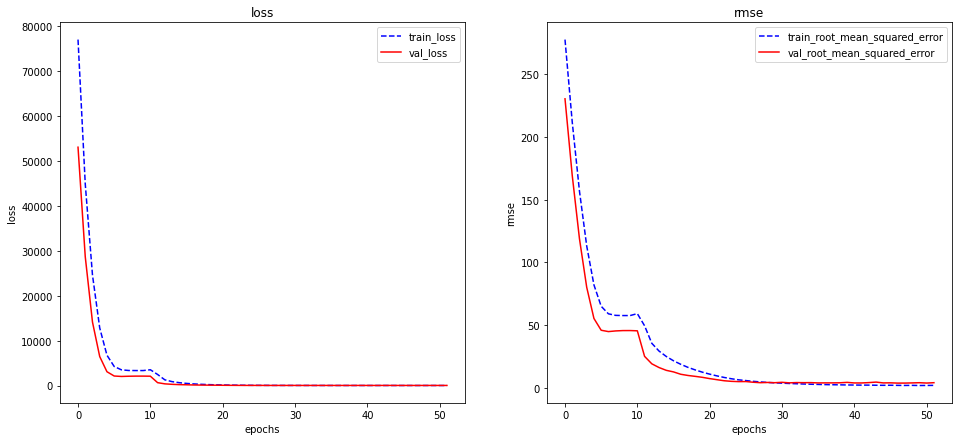

In [274]:
plot_history(history=history)

### Model save

In [311]:
model.save('./model/lstm_c_256_2_e_25_b_144_f_5.h5')

### Model load

In [275]:
from tensorflow.keras.models import load_model

In [276]:
loaded_model = load_model('./model/test.h5')

### Evaluate

In [277]:
loaded_model.evaluate(X_test, y_test)

1683/1683 [==============================] - 37s 22ms/step - loss: 213.3272 - root_mean_squared_error: 14.6057


[213.32717895507812, 14.605724334716797]

In [278]:
y_pred = model.predict(X_test)

1683/1683 [==============================] - 36s 21ms/step


In [279]:
from sklearn.metrics import mean_squared_error, r2_score

In [280]:
np.sqrt(mean_squared_error(y_test, y_pred)) / r2_score(y_test, y_pred)

15.355362694298048

In [ ]:
'''
# Feature 9

- 1 lstm(128), epochs: 50(23), batch_size: 144(1 day)   ->   val_rmse: 5, test_(rmse/r^2): 31.01
- 1 lstm(128)*2, epochs: 50(23), batch_size: 144(1 day)   ->   val_rmse: 5, test_(rmse/r^2): 17.83


# Feature 5

- 1 lstm(128)*2, epochs: 50(23), batch_size: 144(1 day)   ->   val_rmse: 4, test_(rmse/r^2): 16
- 1 lstm(256)*2, epochs: 100(28), batch_size: 144(1 day)   ->   val_rmse: 4, test_(rmse/r^2): 14.76
- 1 lstm(512)*2, epochs: 100(21), batch_size: 144(1 day)   ->   val_rmse: 4, test_(rmse/r^2): 14.08
'''

### Make Sub_mission

In [353]:
sub_mission = pd.read_csv('./data/sub_mission.csv')

sub_mission

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,wl_1018662,wl_1018680,wl_1018683,wl_1019630,month
0,2022-05-31 00:00,25.19,0.00,218.36,25.64,145.89,130.0,314.01,57.72,386.43,286.7,280.2,275.0,261.3,5
1,2022-05-31 00:10,25.19,140.64,218.36,25.64,140.64,120.0,308.24,177.29,366.60,285.7,280.2,275.0,259.3,5
2,2022-05-31 00:20,25.18,0.00,217.99,26.01,139.32,110.0,302.53,222.64,356.89,284.7,280.2,275.0,258.3,5
3,2022-05-31 00:30,25.17,0.00,217.63,26.37,139.74,100.0,302.53,284.49,356.89,284.7,280.2,275.0,258.3,5
4,2022-05-31 00:40,25.17,139.69,217.63,26.37,139.69,90.0,296.87,362.83,366.60,283.7,279.2,275.0,259.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,2022-07-18 23:10,25.04,259.23,212.86,31.14,259.23,510.0,319.84,-456.41,974.40,0.0,0.0,0.0,0.0,7
7052,2022-07-18 23:20,25.04,260.46,212.86,31.14,260.46,492.0,314.01,-717.30,1006.88,0.0,0.0,0.0,0.0,7
7053,2022-07-18 23:30,25.04,259.37,212.86,31.14,259.37,475.0,387.55,-843.37,1039.90,0.0,0.0,0.0,0.0,7
7054,2022-07-18 23:40,25.04,259.13,212.86,31.14,259.13,458.0,454.91,-1023.37,1073.46,0.0,0.0,0.0,0.0,7


In [354]:
X_sub = sub_mission.drop(['ymdhm', 'swl', 'sfw', 'ecpc', 'tide_level', 'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630', 'month'], axis=1)

X_sub

,inf,tototf,fw_1018662,fw_1018683,fw_1019630
0,0.00,145.89,314.01,57.72,386.43
1,140.64,140.64,308.24,177.29,366.60
2,0.00,139.32,302.53,222.64,356.89
3,0.00,139.74,302.53,284.49,356.89
4,139.69,139.69,296.87,362.83,366.60
...,...,...,...,...,...
7051,259.23,259.23,319.84,-456.41,974.40
7052,260.46,260.46,314.01,-717.30,1006.88
7053,259.37,259.37,387.55,-843.37,1039.90
7054,259.13,259.13,454.91,-1023.37,1073.46


In [355]:
X_sub = ss.transform(X_sub)

X_sub

array([[-0.49135472, -0.35566804, -0.46085087, -0.39231639, -0.46884335],
       [-0.36414904, -0.36043463, -0.46740604, -0.30495574, -0.48278238],
       [-0.49135472, -0.36163309, -0.47389304, -0.27182196, -0.48960779],
       ...,
       [-0.25676046, -0.25263698, -0.37730379, -1.05067391, -0.00950232],
       [-0.25697754, -0.25285488, -0.30077766, -1.18218614,  0.01408787],
       [-0.25785488, -0.25373556, -0.15615509, -1.20123349,  0.02603058]])

In [356]:
def make_sequence_feature(feature, window_size):
  feature_list = []

  for i in range(len(feature) - window_size):
    feature_list.append(feature[i : i + window_size])

  return np.array(feature_list)

In [357]:
X_sub = make_sequence_feature(X_sub, window_size)

X_sub.shape

(6912, 144, 5)

In [358]:
y_pred = loaded_model.predict(X_sub)

216/216 [==============================] - 5s 23ms/step


In [359]:
y_pred

array([[283.41968, 272.5235 , 271.2901 , 268.61194],
       [284.90573, 272.48868, 270.77133, 266.15686],
       [285.86487, 272.29483, 270.1776 , 264.1747 ],
       ...,
       [299.9659 , 299.4384 , 301.034  , 312.20752],
       [309.00955, 305.77792, 306.15103, 312.3157 ],
       [321.52173, 313.23856, 312.22766, 312.09418]], dtype=float32)

In [360]:
sub_mission = pd.read_csv('./data/sample_submission.csv')

sub_mission

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 00:00,0,0,0,0
1,2022-06-01 00:10,0,0,0,0
2,2022-06-01 00:20,0,0,0,0
3,2022-06-01 00:30,0,0,0,0
4,2022-06-01 00:40,0,0,0,0
...,...,...,...,...,...
6907,2022-07-18 23:10,0,0,0,0
6908,2022-07-18 23:20,0,0,0,0
6909,2022-07-18 23:30,0,0,0,0
6910,2022-07-18 23:40,0,0,0,0


In [361]:
sub_mission[['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']] = y_pred

In [362]:
sub_mission

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 00:00,283.419678,272.523499,271.290100,268.611938
1,2022-06-01 00:10,284.905731,272.488678,270.771332,266.156860
2,2022-06-01 00:20,285.864868,272.294830,270.177612,264.174713
3,2022-06-01 00:30,286.760803,272.420074,269.771667,262.149658
4,2022-06-01 00:40,287.027618,272.429138,269.331024,260.604584
...,...,...,...,...,...
6907,2022-07-18 23:10,291.129608,289.729889,290.103271,305.703674
6908,2022-07-18 23:20,295.354523,295.355774,296.977509,310.480408
6909,2022-07-18 23:30,299.965912,299.438385,301.033997,312.207520
6910,2022-07-18 23:40,309.009552,305.777924,306.151031,312.315704


In [363]:
sub_mission.to_csv('./result/submission(lstm_512_x2_e_100_b_144_f_5).csv', index=False)